In [ ]:
#Imprt the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10
from warnings import filterwarnings
filterwarnings("ignore")

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error


from sklearn.impute import SimpleImputer

In [ ]:
#Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Directory path for Problem 2
path="/content/drive/My Drive/Great Learning/Machine learning-2/Election_Data.xlsx"

In [ ]:
#read the Data
df=pd.read_excel(path)

In [ ]:
#top five rows
df.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [ ]:
#Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


There are 10 Variable
* 8 int64 Datatype Variable
* 2 Object Data type- Both need to be converted on Categorical Data type
* No Null values
* Unnamed need to be drop

In [ ]:
#shape of Data
df.shape

(1525, 10)

There are 1525 rows and 10 Columns

In [ ]:
#Check the NUll Value
df.isnull().sum().loc[lambda x:x>0]

Series([], dtype: int64)

There is no Null Value in the Data set

In [ ]:
#Check Duplicate Value
df.duplicated().sum()

0

In [ ]:
#drop the first column
df.drop("Unnamed: 0", axis=1, inplace=True) #INSERT

In [ ]:
#copy of the dataset for the scatter plot
df_pair=df.copy()

There is no Duplicate Value in the Data set

In [ ]:
#change the Data type of Object and some int to Categorical, INSERT
df["vote"]=df["vote"].astype("category")
df["gender"]=df["gender"].astype("category")
df["economic.cond.national"]=df["economic.cond.national"].astype("category")
df["economic.cond.household"]=df["economic.cond.household"].astype("category")
df["Blair"]=df["Blair"].astype("category")
df["Hague"]=df["Hague"].astype("category")
df["Europe"]=df["Europe"].astype("category")
df["political.knowledge"]=df["political.knowledge"].astype("category")



In [ ]:
#Check change datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1525 non-null   category
 1   age                      1525 non-null   int64   
 2   economic.cond.national   1525 non-null   category
 3   economic.cond.household  1525 non-null   category
 4   Blair                    1525 non-null   category
 5   Hague                    1525 non-null   category
 6   Europe                   1525 non-null   category
 7   political.knowledge      1525 non-null   category
 8   gender                   1525 non-null   category
dtypes: category(8), int64(1)
memory usage: 25.6 KB


In [ ]:
#check first five rows
df.head()

vote  age economic.cond.national economic.cond.household Blair Hague  \
0  Labour   43                      3                       3     4     1   
1  Labour   36                      4                       4     4     4   
2  Labour   35                      4                       4     5     2   
3  Labour   24                      4                       2     2     1   
4  Labour   41                      2                       2     1     1   

  Europe political.knowledge  gender  
0      2                   2  female  
1      5                   2    male  
2      3                   2    male  
3      4                   0  female  
4      6                   2    male

In [ ]:
#check last five rows
df.tail()

vote  age  economic.cond.national  economic.cond.household  \
1520  Conservative   67                       5                        3   
1521  Conservative   73                       2                        2   
1522        Labour   37                       3                        3   
1523  Conservative   61                       3                        3   
1524  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender  
1520      2      4      11                    3    male  
1521      4      4       8                    2    male  
1522      5      4       2                    2    male  
1523      1      4      11                    2    male  
1524      2      4      11                    0  female

In [ ]:
#describe Stats
df.describe(include="all").T

count unique     top  freq       mean        std  \
vote                       1525      2  Labour  1063        NaN        NaN   
age                      1525.0    NaN     NaN   NaN  54.182295  15.711209   
economic.cond.national   1525.0    NaN     NaN   NaN   3.245902   0.880969   
economic.cond.household  1525.0    NaN     NaN   NaN   3.140328   0.929951   
Blair                    1525.0    NaN     NaN   NaN   3.334426   1.174824   
Hague                    1525.0    NaN     NaN   NaN   2.746885   1.230703   
Europe                   1525.0    NaN     NaN   NaN   6.728525   3.297538   
political.knowledge      1525.0    NaN     NaN   NaN   1.542295   1.083315   
gender                     1525      2  female   812        NaN        NaN   

                          min   25%   50%   75%   max  
vote                      NaN   NaN   NaN   NaN   NaN  
age                      24.0  41.0  53.0  67.0  93.0  
economic.cond.national    1.0   3.0   3.0   4.0   5.0  
economic.cond.household   1.0   3.0   3.0   4.0   5.0  
Blair                     1.0   2.0   4.0   4.0   5.0  
Hague                     1.0   2.0   2.0   4.0   5.0  
Europe                    1.0   4.0   6.0  10.0  11.0  
political.knowledge       0.0   0.0   2.0   2.0   3.0  
gender                    NaN   NaN   NaN   NaN   NaN

Vote:

- 2 parties: Conservative and Labour
- Labour is the most frequent choice (1063 out of 1525)

Age:

- Mean: 54.18 years
- Range: 24-93 years

Economic Conditions:

- National: Mean=3.25, Range=1-5
- Household: Mean=3.14, Range=1-5

Leaders:

- Blair (Labour): Mean=3.33, Range=1-5
- Hague (Conservative): Mean=2.75, Range=1-5

Europe:

- Mean=6.73, Range=1-11
- Higher scores indicate Eurosceptic sentiment

Political Knowledge:

- Mean=1.54, Range=0-3
- Measures knowledge of parties' positions on European integration

Gender:

- 2 categories: female (812) and male (713)

This summary provides an overview of the distribution of values for each variable, highlighting the central tendency, range, and frequency of each variable.

In [ ]:
#copy the Data set for analysis
df1=df.copy()  #INSERT

In [ ]:
#Function to show the Univarient Analsysis
def histogram_boxplot(data, variable, bins="auto"):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
  #fig, axes = plt.subplots(2, 1, figsize=(8, 6))

  a1=sns.histplot(data[variable], kde=True, bins=10, color="teal", ec="r", ax=axes[0])
  a1.bar_label(a1.containers[0], color='teal')
  a1.set_xlabel(variable)
  a1.set_ylabel(variable)
  a1.set_title(variable)
  a1.axvline(data[variable].mean(), color="green", linestyle="--")
  a1.axvline(data[variable].median(), color="black", linestyle="-")
  a2=sns.boxplot(data[variable], orient="v", showmeans = True, color="teal", ax=axes[1])
  a2.set_xlabel(variable)
  a2.set_ylabel(variable)
  a2.set_title(variable)
  fig.suptitle('Histogram and Boxplot for ' + variable)
  plt.tight_layout()
  plt.show()

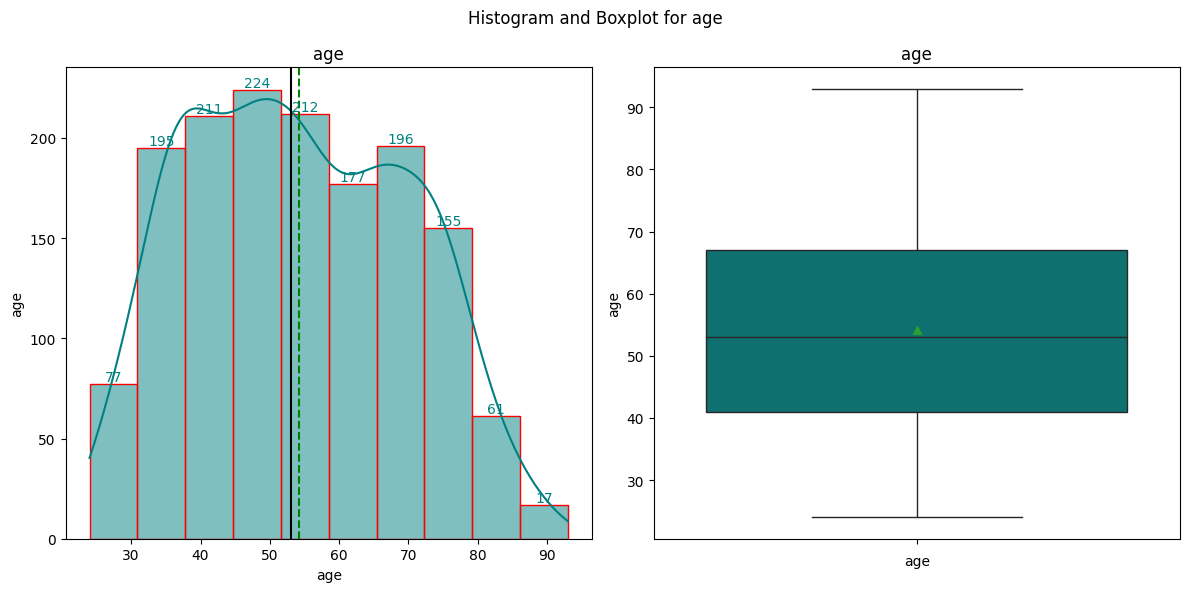

Skewness: 0.14462077228942483
Statistical Summary count    1525.000000
mean       54.182295
std        15.711209
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64
________________________


In [ ]:
#loop to run the histogram_boxplot for differnt variaable
for i in df1.columns:
    if df1[i].dtypes!="category":
        histogram_boxplot(df1, i)
        print("Skewness:", df1[i].skew())
        print("Statistical Summary", df1[i].describe())
        print("________________________")

In [ ]:
#Function to Plot the Barplot for the Categorical Values
def bar_plot(data, variable):

  a1 = sns.countplot(x=data[variable], order=data[variable].value_counts().index, color='teal')
  a1.bar_label(a1.containers[0], color='teal')
  a1.set_xlabel(variable)
  plt.xticks(rotation=45)
  a1.set_ylabel("Count")
  a1.set_title(variable)
  plt.show()

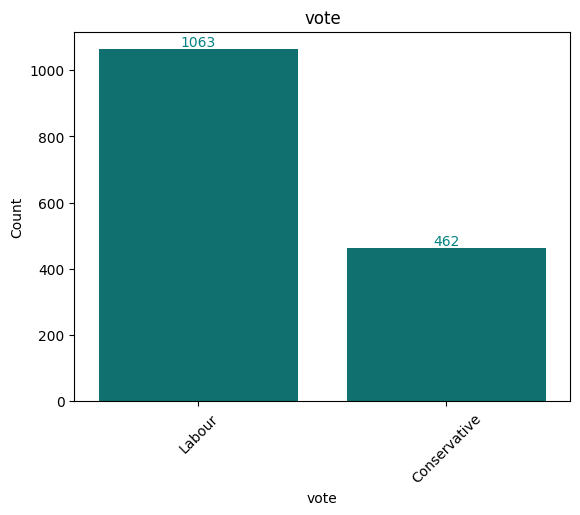

vote
Labour          1063
Conservative     462
Name: count, dtype: int64
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
_____________________________


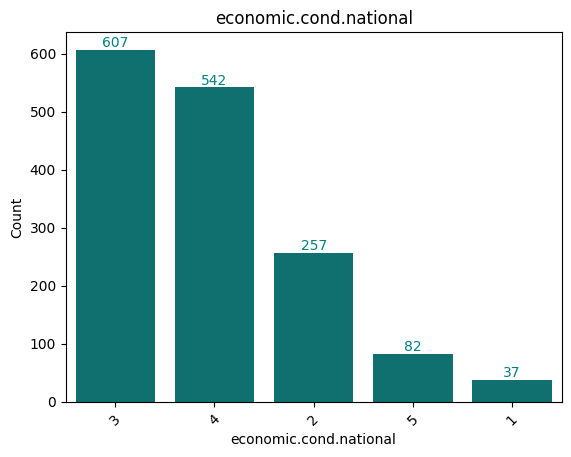

economic.cond.national
3    607
4    542
2    257
5     82
1     37
Name: count, dtype: int64
[3, 4, 2, 1, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
_____________________________


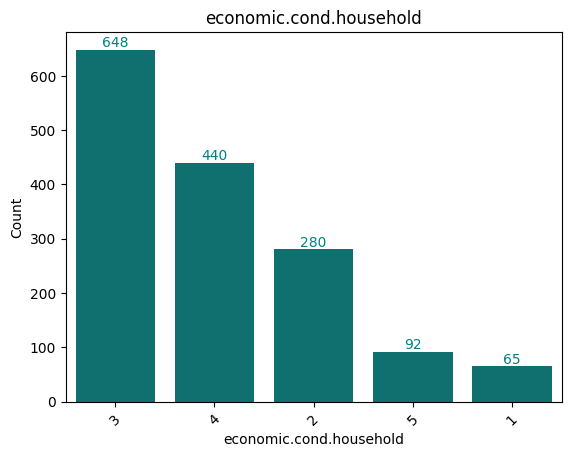

economic.cond.household
3    648
4    440
2    280
5     92
1     65
Name: count, dtype: int64
[3, 4, 2, 1, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
_____________________________


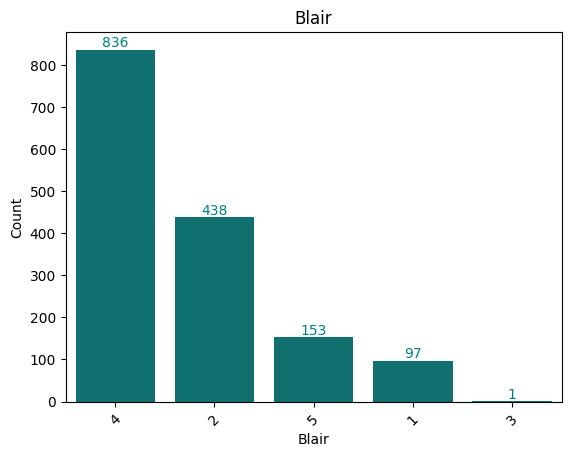

Blair
4    836
2    438
5    153
1     97
3      1
Name: count, dtype: int64
[4, 5, 2, 1, 3]
Categories (5, int64): [1, 2, 3, 4, 5]
_____________________________


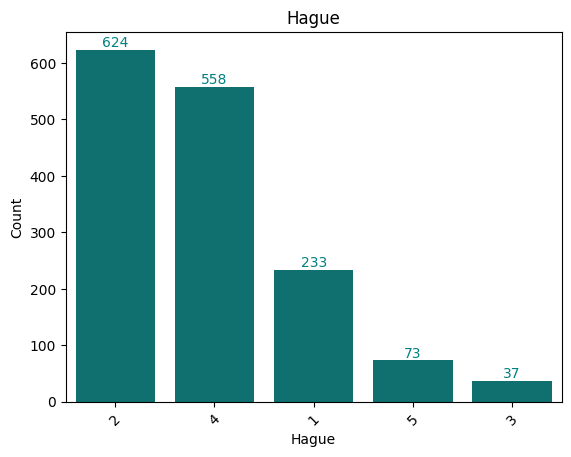

Hague
2    624
4    558
1    233
5     73
3     37
Name: count, dtype: int64
[1, 4, 2, 5, 3]
Categories (5, int64): [1, 2, 3, 4, 5]
_____________________________


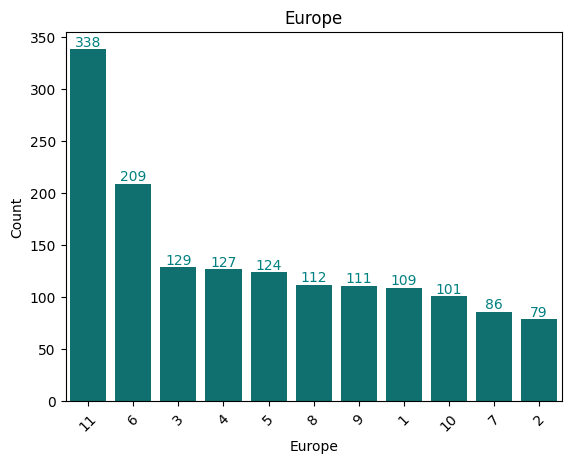

Europe
11    338
6     209
3     129
4     127
5     124
     ... 
9     111
1     109
10    101
7      86
2      79
Name: count, Length: 11, dtype: int64
[2, 5, 3, 4, 6, ..., 1, 7, 9, 10, 8]
Length: 11
Categories (11, int64): [1, 2, 3, 4, ..., 8, 9, 10, 11]
_____________________________


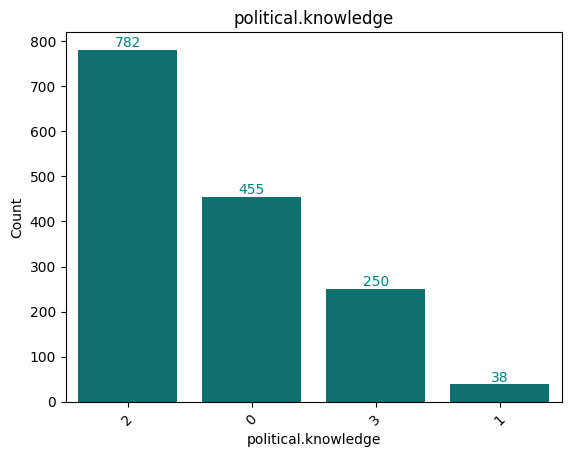

political.knowledge
2    782
0    455
3    250
1     38
Name: count, dtype: int64
[2, 0, 3, 1]
Categories (4, int64): [0, 1, 2, 3]
_____________________________


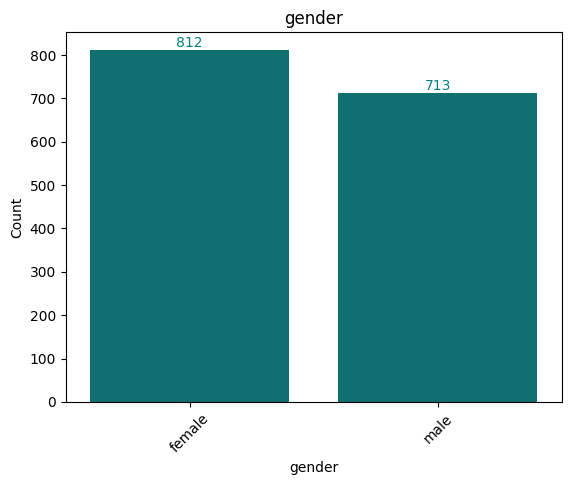

gender
female    812
male      713
Name: count, dtype: int64
['female', 'male']
Categories (2, object): ['female', 'male']
_____________________________


In [ ]:
#To show the Count Plot of all the Categorical Values with  Unique Variable in each category

for i in df1.columns:
    if  df1[i].dtypes=="category":
        bar_plot(df1, i)
        print(df1[i].value_counts().sort_values(ascending=False))
        print(df1[i].unique())
        print("_____________________________")

In [ ]:
pd.set_option('display.max_rows', None)
df1.Europe.value_counts()

Europe
11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: count, dtype: int64

Multivariate analysis

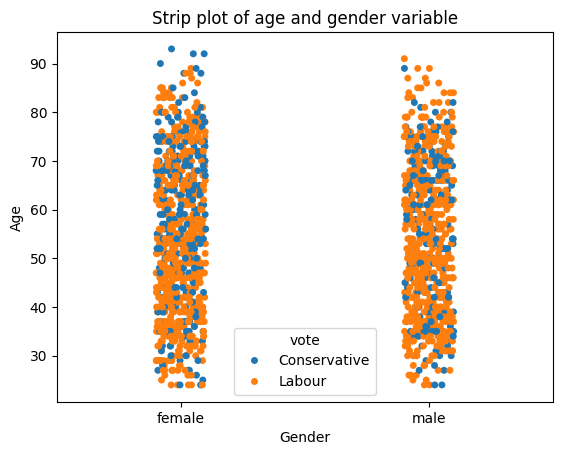

In [ ]:
#strip plot of age and gender variable
sns.stripplot(y="age", x="gender", data=df1, hue="vote")
 #label of figure
plt.title("Strip plot of age and gender variable")
 #label of x-axis
plt.xlabel("Gender")
 #label of y-axis
plt.ylabel("Age")
plt.show()

In [ ]:
# create age groups
age_groups = pd.cut(df['age'], bins=[20, 40, 60, 80,100], labels=['20-39', '40-59', '60-79', '80+'])
# add age groups to the dataframe
df1['age_group'] = age_groups

# group the data by age group
grouped_data = df1.groupby('age_group')

# print the grouped data
print(grouped_data.describe())

             age                                                   
           count       mean       std   min   25%   50%   75%   max
age_group                                                          
20-39      367.0  34.209809  4.297300  24.0  31.0  35.0  38.0  40.0
40-59      596.0  50.208054  5.512736  41.0  46.0  50.0  55.0  60.0
60-79      500.0  69.782000  5.500089  61.0  65.0  70.0  74.0  80.0
80+         62.0  84.806452  3.187263  81.0  82.0  84.0  87.0  93.0


In [ ]:
df1.head()

vote  age economic.cond.national economic.cond.household Blair Hague  \
0  Labour   43                      3                       3     4     1   
1  Labour   36                      4                       4     4     4   
2  Labour   35                      4                       4     5     2   
3  Labour   24                      4                       2     2     1   
4  Labour   41                      2                       2     1     1   

  Europe political.knowledge  gender age_group  
0      2                   2  female     40-59  
1      5                   2    male     20-39  
2      3                   2    male     20-39  
3      4                   0  female     20-39  
4      6                   2    male     40-59

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1525 non-null   category
 1   age                      1525 non-null   int64   
 2   economic.cond.national   1525 non-null   int64   
 3   economic.cond.household  1525 non-null   int64   
 4   Blair                    1525 non-null   int64   
 5   Hague                    1525 non-null   int64   
 6   Europe                   1525 non-null   int64   
 7   political.knowledge      1525 non-null   int64   
 8   gender                   1525 non-null   category
 9   age_group                1525 non-null   category
dtypes: category(3), int64(7)
memory usage: 88.4 KB


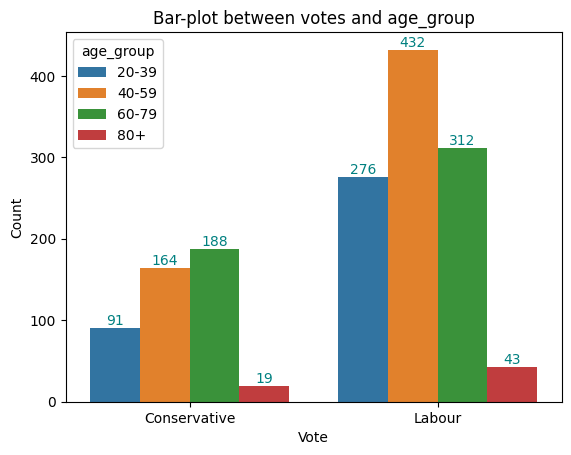

In [ ]:
#create the bar-plot between votes and age_group by sns
ax=sns.countplot(x="vote",hue="age_group", data=df1)
plt.bar_label(ax.containers[0], color='teal')
plt.bar_label(ax.containers[1], color='teal')
plt.bar_label(ax.containers[2], color='teal')
plt.bar_label(ax.containers[3], color='teal')
plt.title("Bar-plot between votes and age_group")
plt.xlabel("Vote")
plt.ylabel("Count")
plt.show()

In [ ]:
#groupby between votes and age_group by percentage
df1.groupby(["vote","age_group"]).size().unstack().apply(lambda x: x/x.sum()*100, axis=1)


age_group         20-39      40-59      60-79       80+
vote                                                   
Conservative  19.696970  35.497835  40.692641  4.112554
Labour        25.964252  40.639699  29.350894  4.045155

- Labour has a stronger support among younger voters (20-39 years)
- Conservative has a stronger support among older voters (60-79 years)
- Both parties have similar support among voters in their 40s and 50s and 80+ (40-59 years)


In [ ]:
pd.crosstab(df1["vote"], df1["age_group"], margins=True)

age_group     20-39  40-59  60-79  80+   All
vote                                        
Conservative     91    164    188   19   462
Labour          276    432    312   43  1063
All             367    596    500   62  1525

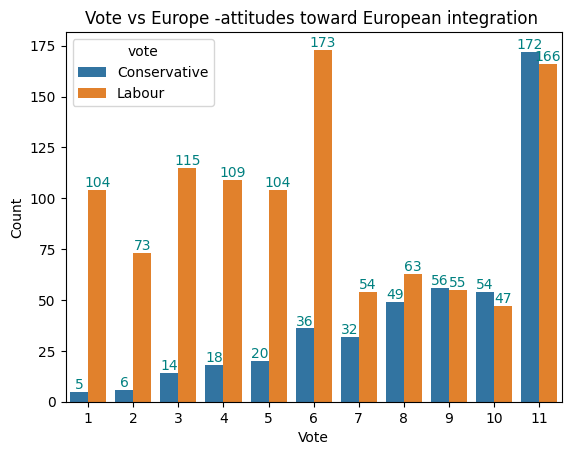

In [ ]:
#create the bar-plot between votes and age_group by sns
ax=sns.countplot(x="Europe",hue="vote", data=df1)
plt.bar_label(ax.containers[0], color='teal')
plt.bar_label(ax.containers[1], color='teal')
#plt.bar_label(ax.containers[2], color='teal')
#plt.bar_label(ax.containers[3], color='teal')
plt.title("Vote vs Europe -attitudes toward European integration ")
plt.xlabel("Vote")
plt.ylabel("Count")
plt.show()

In [ ]:
#groupby between votes and age_group by percentage
round(df1.groupby(["vote","Europe"]).size().unstack().apply(lambda x: x/x.sum()*100, axis=1),2)


Europe          1     2      3      4     5      6     7      8      9   \
vote                                                                      
Conservative  1.08  1.30   3.03   3.90  4.33   7.79  6.93  10.61  12.12   
Labour        9.78  6.87  10.82  10.25  9.78  16.27  5.08   5.93   5.17   

Europe           10     11  
vote                        
Conservative  11.69  37.23  
Labour         4.42  15.62

In [ ]:
pd.crosstab(df1["vote"], df1["Europe"], margins=True)

Europe          1   2    3    4    5    6   7    8    9   10   11   All
vote                                                                   
Conservative    5   6   14   18   20   36  32   49   56   54  172   462
Labour        104  73  115  109  104  173  54   63   55   47  166  1063
All           109  79  129  127  124  209  86  112  111  101  338  1525

- Labour has a strong lead among those with a more pro-European attitude (1-3)
- Conservative has a strong lead among those with a more Eurosceptic attitude (8-11)
- Both parties have similar support among those with a neutral attitude (4-7)

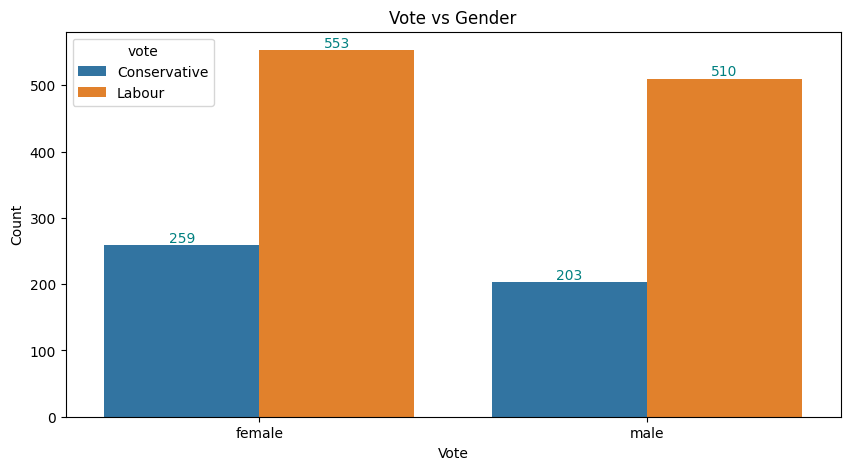

In [ ]:
#create the bar-plot between votes and gender by sns
plt.figure(figsize=(10,5))
ax=sns.countplot(x="gender",hue="vote", data=df1)
plt.bar_label(ax.containers[0], color='teal')
plt.bar_label(ax.containers[1], color='teal')
#plt.bar_label(ax.containers[2], color='teal')
#plt.bar_label(ax.containers[3], color='teal')
plt.title("Vote vs Gender")
plt.xlabel("Vote")
plt.ylabel("Count")
plt.show()

In [ ]:

#groupby between votes and age_group by percentage
round(df1.groupby(["vote","gender"]).size().unstack().apply(lambda x: x/x.sum()*100, axis=1),2)

gender        female   male
vote                       
Conservative   56.06  43.94
Labour         52.02  47.98

In [ ]:
pd.crosstab(df1["vote"], df1["gender"], margins=True)

gender        female  male   All
vote                            
Conservative     259   203   462
Labour           553   510  1063
All              812   713  1525

This output shows the distribution of votes for each party (Conservative and Labour) by gender, as well as the total number of votes for each gender and party.

Here are the key points:

- Female:
    - Conservative: 56.06% (259 votes)
    - Labour: 52.02% (553 votes)
- Male:
    - Conservative: 43.94% (203 votes)
    - Labour: 47.98% (510 votes)

The total number of votes for each party is:

- Conservative: 462
- Labour: 1063

The total number of votes for each gender is:

- Female: 812
- Male: 713

This suggests that:

- Women are more likely to vote Conservative than men (56.06% vs 43.94%)
- Men are more likely to vote Labour than Conservative (47.98% vs 43.94%)
- The total number of votes for women is higher than for men (812 vs 713

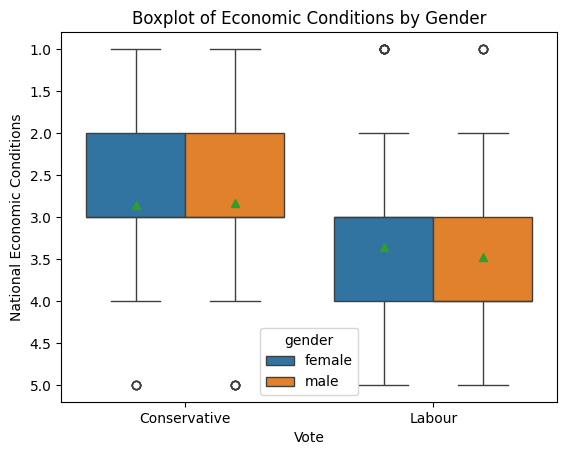

In [ ]:
sns.boxplot(x='vote', y='economic.cond.national', hue="gender", data=df, showmeans=True)
plt.title("Boxplot of Economic Conditions by Gender")
plt.ylabel("National Economic Conditions")
plt.xlabel("Vote")
plt.show()


In [ ]:
round(df.groupby(["gender", "economic.cond.national", "vote"]).size().unstack().apply(lambda x: x/x.sum()*100, axis=1),2)

vote                           Conservative  Labour
gender economic.cond.national                      
female 1                              52.17   47.83
       2                              53.62   46.38
       3                              34.31   65.69
       4                              19.05   80.95
       5                              10.81   89.19
male   1                              64.29   35.71
       2                              55.46   44.54
       3                              31.20   68.80
       4                              14.87   85.13
       5                              11.11   88.89

In [ ]:
pd.crosstab(df['vote'], [df['economic.cond.national'], df['gender']], margins=True)

economic.cond.national      1           2           3           4           5  \
gender                 female male female male female male female male female   
vote                                                                            
Conservative               12    9     74   66    117   83     52   40      4   
Labour                     11    5     64   53    224  183    221  229     33   
All                        23   14    138  119    341  266    273  269     37   

economic.cond.national        All  
gender                 male        
vote                               
Conservative              5   462  
Labour                   40  1063  
All                      45  1525

This output shows the percentage of votes for each party (Conservative and Labour) by gender and economic condition (1-5), as well as the total number of votes for each economic condition and gender category.

Here are the key points:

- Female:
    - Economic condition 1: Conservative (52.17%), Labour (47.83%)
    - Economic condition 2: Conservative (53.62%), Labour (46.38%)
    - Economic condition 3: Conservative (34.31%), Labour (65.69%)
    - Economic condition 4: Conservative (19.05%), Labour (80.95%)
    - Economic condition 5: Conservative (10.81%), Labour (89.19%)
- Male:
    - Economic condition 1: Conservative (64.29%), Labour (35.71%)
    - Economic condition 2: Conservative (55.46%), Labour (44.54%)
    - Economic condition 3: Conservative (31.20%), Labour (68.80%)
    - Economic condition 4: Conservative (14.87%), Labour (85.13%)
    - Economic condition 5: Conservative (11.11%), Labour (88.89%)

The total number of votes for each party is:

- Conservative: 462
- Labour: 1063

The total number of votes for each economic condition and gender category is:

- Economic condition 1: 23 (female), 14 (male)
- Economic condition 2: 138 (female), 119 (male)
- Economic condition 3: 341 (female), 266 (male)
- Economic condition 4: 273 (female), 269 (male)
- Economic condition 5: 37 (female), 45 (male)

This suggests that:

- Labour and Conservative both have strong lead among femalesand males economic condition (3-5)
- The total number of votes for females is higher than for males in most economic condition categories.

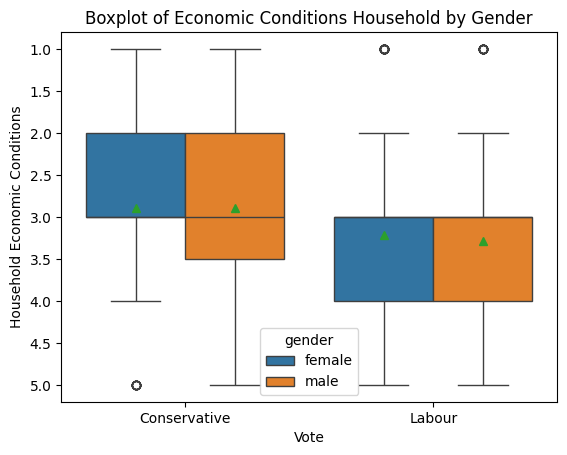

In [ ]:
sns.boxplot(x='vote', y='economic.cond.household', hue="gender", data=df, showmeans=True)
plt.title("Boxplot of Economic Conditions Household by Gender")
plt.ylabel("Household Economic Conditions")
plt.xlabel("Vote")
plt.show()


In [ ]:
round(df.groupby(["gender", "economic.cond.household", "vote"]).size().unstack().apply(lambda x: x/x.sum()*100, axis=1),2)

vote                            Conservative  Labour
gender economic.cond.household                      
female 1                               37.84   62.16
       2                               44.44   55.56
       3                               33.71   66.29
       4                               21.59   78.41
       5                               22.22   77.78
male   1                               50.00   50.00
       2                               45.67   54.33
       3                               26.85   73.15
       4                               17.84   82.16
       5                               27.66   72.34

In [ ]:
pd.crosstab(df['vote'], [df['economic.cond.household'], df['gender']], margins=True)

economic.cond.household      1           2           3           4       \
gender                  female male female male female male female male   
vote                                                                      
Conservative                14   14     68   58    118   80     49   38   
Labour                      23   14     85   69    232  218    178  175   
All                         37   28    153  127    350  298    227  213   

economic.cond.household      5        All  
gender                  female male        
vote                                       
Conservative                10   13   462  
Labour                      35   34  1063  
All                         45   47  1525

This output shows the percentage of votes for each party (Conservative and Labour) by gender and economic condition of the household (1-5), as well as the total number of votes for each economic condition and gender category.

Here are the key points:

- Female:
    - Economic condition 1: Conservative (37.84%), Labour (62.16%)
    - Economic condition 2: Conservative (44.44%), Labour (55.56%)
    - Economic condition 3: Conservative (33.71%), Labour (66.29%)
    - Economic condition 4: Conservative (21.59%), Labour (78.41%)
    - Economic condition 5: Conservative (22.22%), Labour (77.78%)
- Male:
    - Economic condition 1: Conservative (50.00%), Labour (50.00%)
    - Economic condition 2: Conservative (45.67%), Labour (54.33%)
    - Economic condition 3: Conservative (26.85%), Labour (73.15%)
    - Economic condition 4: Conservative (17.84%), Labour (82.16%)
    - Economic condition 5: Conservative (27.66%), Labour (72.34%)

The total number of votes for each party is:

- Conservative: 462
- Labour: 1063

The total number of votes for each economic condition and gender category is:

- Economic condition 1: 37 (female), 28 (male)
- Economic condition 2: 153 (female), 127 (male)
- Economic condition 3: 350 (female), 298 (male)
- Economic condition 4: 227 (female), 213 (male)
- Economic condition 5: 45 (female), 47 (male)

This suggests that:

- Labour has a strong lead among females and males with a  economic condition (3-5)

- The total number of votes for females is higher than for males in most economic condition categories.

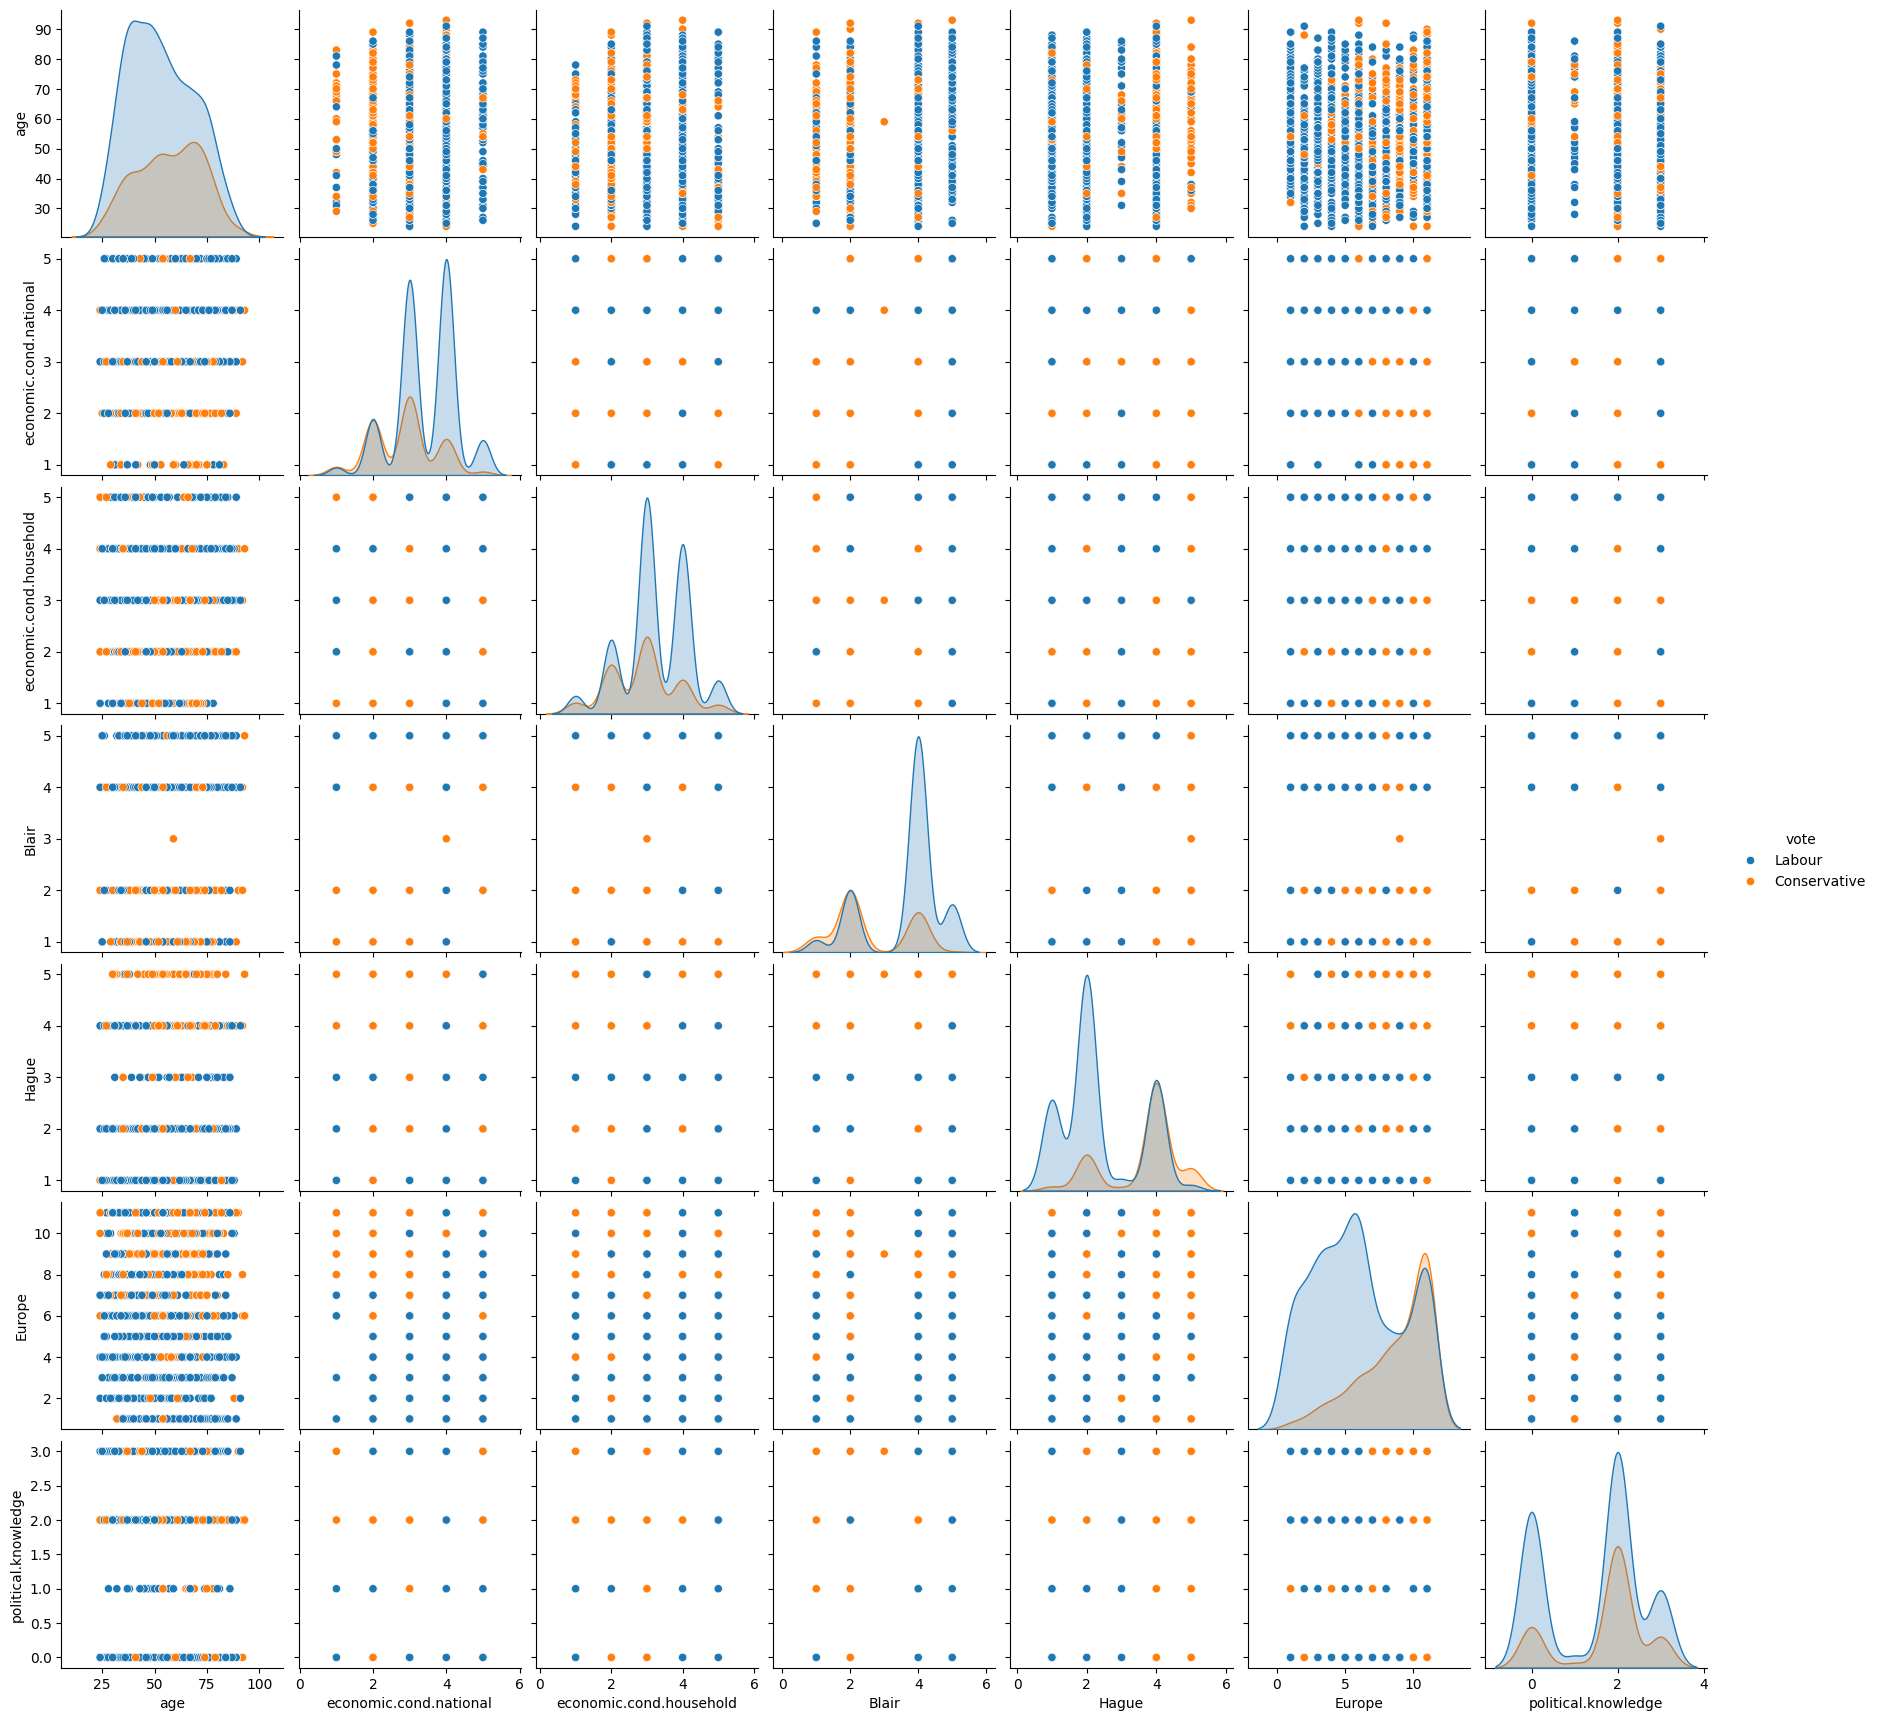

In [ ]:
#include all variable for pairplot
sns.pairplot(df_pair, hue='vote')
plt.show()

In [ ]:
df_num_heat = df_pair.select_dtypes(include=['int64', 'float64'])

<Axes: >

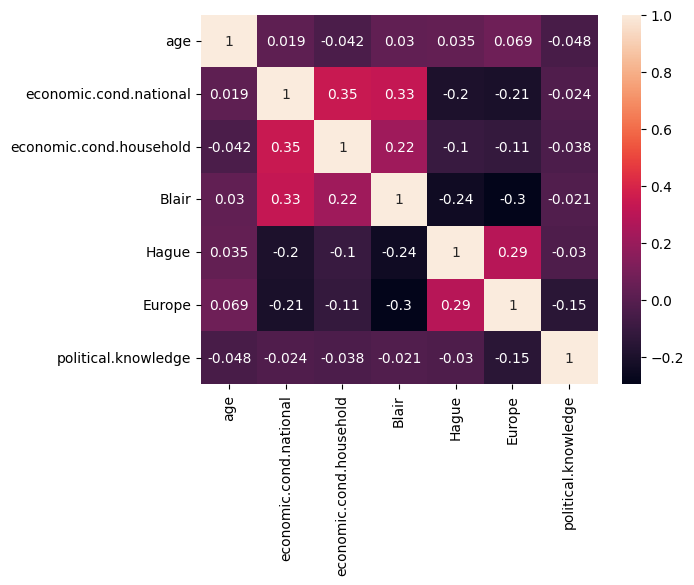

In [ ]:
sns.heatmap(df_num_heat.corr(), annot=True)

###Data Pre-processing



In [ ]:
df_num=df.select_dtypes(include=['int64', 'float64'])

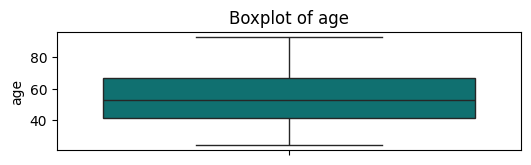

In [ ]:
#Check for presence of outliers in each feature
plt.figure(figsize = (15,10))
feature_list = df_num.columns #insert
for i in range(len(feature_list)):
    plt.subplot(7, 3, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num, color="teal") #insert
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [ ]:
#function counts the number of outliers in a particular column of a dataframe
def count_outliers(df, col):
  Q1, Q3 = df[col].quantile([0.25, 0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  outliers = df[((df[col] < lower_range) | (df[col] > upper_range))]
  return len(outliers)

In [ ]:
#For Loop to found the Number of Outler in each column with the percantage of the Outlier in a particular column
for column in df_num:
    print(column)
    print(count_outliers(df_num, column))
    print("Percentage of Outlier with the  Original Datset", round((count_outliers(df_num, column)/len(df_num))*100,2))
    print(df_num[column].skew())
    print("__________________________")

age
0
Percentage of Outlier with the  Original Datset 0.0
0.14462077228942483
__________________________


* Age Variable does not have any outlier in the Dataset

In [ ]:
#copy the Data  #INSERT
df2=df.copy()

In [ ]:
#df
df2["vote"].value_counts()

vote
Labour          1063
Conservative     462
Name: count, dtype: int64

In [ ]:
#
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1525 non-null   category
 1   age                      1525 non-null   int64   
 2   economic.cond.national   1525 non-null   category
 3   economic.cond.household  1525 non-null   category
 4   Blair                    1525 non-null   category
 5   Hague                    1525 non-null   category
 6   Europe                   1525 non-null   category
 7   political.knowledge      1525 non-null   category
 8   gender                   1525 non-null   category
dtypes: category(8), int64(1)
memory usage: 25.6 KB


In [ ]:
df2["vote"]=df2["vote"].astype("category")
df2["gender"]=df2["gender"].astype("category")

In [ ]:
#Encode
from sklearn.preprocessing import LabelEncoder #
label_encoder = LabelEncoder()
df2["vote"] = label_encoder.fit_transform(df2["vote"])
df2["gender"]=label_encoder.fit_transform(df2["gender"])

In [ ]:
df2.head()

vote  age economic.cond.national economic.cond.household Blair Hague  \
0     1   43                      3                       3     4     1   
1     1   36                      4                       4     4     4   
2     1   35                      4                       4     5     2   
3     1   24                      4                       2     2     1   
4     1   41                      2                       2     1     1   

  Europe political.knowledge  gender  
0      2                   2       0  
1      5                   2       1  
2      3                   2       1  
3      4                   0       0  
4      6                   2       1

* Label encode as 1
* conservative encode as 0

- Female encode as 0
* Male encode as 1



In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df3=df2.copy()  #INSERT

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1525 non-null   int64
 1   economic.cond.national   1525 non-null   int64
 2   economic.cond.household  1525 non-null   int64
 3   Blair                    1525 non-null   int64
 4   Hague                    1525 non-null   int64
 5   Europe                   1525 non-null   int64
 6   political.knowledge      1525 non-null   int64
dtypes: int64(7)
memory usage: 83.5 KB


In [ ]:
df_num2=df_num.copy()

In [ ]:
df3=scaler.fit_transform(df3)

In [ ]:
df3

array([[1.        , 0.27536232, 0.5       , ..., 0.1       , 0.66666667,
        0.        ],
       [1.        , 0.17391304, 0.75      , ..., 0.4       , 0.66666667,
        1.        ],
       [1.        , 0.15942029, 0.75      , ..., 0.2       , 0.66666667,
        1.        ],
       ...,
       [1.        , 0.1884058 , 0.5       , ..., 0.1       , 0.66666667,
        1.        ],
       [0.        , 0.53623188, 0.5       , ..., 1.        , 0.66666667,
        1.        ],
       [0.        , 0.72463768, 0.25      , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
df2=pd.DataFrame(df3, columns=df2.columns)

In [ ]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [ ]:
#Encode and scaled dataframe
df2.head()

vote       age  economic.cond.national  economic.cond.household  Blair  \
0   1.0  0.275362                    0.50                     0.50   0.75   
1   1.0  0.173913                    0.75                     0.75   0.75   
2   1.0  0.159420                    0.75                     0.75   1.00   
3   1.0  0.000000                    0.75                     0.25   0.25   
4   1.0  0.246377                    0.25                     0.25   0.00   

   Hague  Europe  political.knowledge  gender  
0   0.00     0.1             0.666667     0.0  
1   0.75     0.4             0.666667     1.0  
2   0.25     0.2             0.666667     1.0  
3   0.00     0.3             0.000000     0.0  
4   0.00     0.5             0.666667     1.0

In [ ]:
df_num["vote"]=df2["vote"]  #need to cut
df_num["gender"]=df2["gender"]

In [ ]:
df_num.head() #need to cut

age  vote  gender
0   43   1.0     0.0
1   36   1.0     1.0
2   35   1.0     1.0
3   24   1.0     0.0
4   41   1.0     1.0

In [ ]:
#dependend Variable
y=df2["vote"]

In [ ]:
y=np.array(y)

In [ ]:
#independent Variable
x=df2.drop("vote", axis=1)

In [ ]:
x=np.array(x)

In [ ]:
#split the Data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#shape of the Split Data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1067, 8), (458, 8), (1067,), (458,))

In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
vote
1.0    0.697282
0.0    0.302718
Name: proportion, dtype: float64
Percentage of classes in test set:
vote
1.0    0.696507
0.0    0.303493
Name: proportion, dtype: float64


Scaling: This process transforms your features to lie in a specific range, typically [0, 1]. It's essential because many machine learning algorithms perform better when the numerical features are on the same scale.
MinMaxScaler: This scaler transforms the data such that each feature is in the given range (default is [0, 1]).

###Model Building
- Model Building (KNN, Naive bayes, Bagging, Boosting)

Model Building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

def get_metrics_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    train_f1 = f1_score(y_train, pred_train)
    test_f1 = f1_score(y_test, pred_test)

    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision, train_f1, test_f1))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag:
        print("Accuracy on training set : ", train_acc)
        print("Accuracy on test set : ", test_acc)
        print("Recall on training set : ", train_recall)
        print("Recall on test set : ", test_recall)
        print("Precision on training set : ", train_precision)
        print("Precision on test set : ", test_precision)
        print("F1 Score on training set : ", train_f1)
        print("F1 Score on test set : ", test_f1)

    return score_list # returning the list with train and test scores


In [ ]:
#Model Building (KNN)
knn = KNeighborsClassifier()# define the Model
knn.fit(X_train, y_train)# fit the model on the training data
y_pred_knn = knn.predict(X_train)# make predictions on the Train data

In [ ]:
MCE=[]
for i in range(2,20,1):
  knn=KNeighborsClassifier(n_neighbors=i)#this is equivalent to using manhattan_distance (l1
  knn.fit(X_train, y_train)
  y_pred_knn=knn.predict(X_train)#prediction on X_train
  print("k_neighbour=",i)
  print("Accuracy:",round(metrics.accuracy_score(y_train, y_pred_knn),2))
  MCE.append(1-metrics.accuracy_score(y_train, y_pred_knn))
  print("MCE:",round(1-metrics.accuracy_score(y_train, y_pred_knn),2))
  print("_____________________")


#knn = KNeighborsClassifier(n_neighbors=)# define the Model

k_neighbour= 2
Accuracy: 0.87
MCE: 0.13
_____________________
k_neighbour= 3
Accuracy: 0.88
MCE: 0.12
_____________________
k_neighbour= 4
Accuracy: 0.86
MCE: 0.14
_____________________
k_neighbour= 5
Accuracy: 0.87
MCE: 0.13
_____________________
k_neighbour= 6
Accuracy: 0.85
MCE: 0.15
_____________________
k_neighbour= 7
Accuracy: 0.85
MCE: 0.15
_____________________
k_neighbour= 8
Accuracy: 0.84
MCE: 0.16
_____________________
k_neighbour= 9
Accuracy: 0.85
MCE: 0.15
_____________________
k_neighbour= 10
Accuracy: 0.84
MCE: 0.16
_____________________
k_neighbour= 11
Accuracy: 0.84
MCE: 0.16
_____________________
k_neighbour= 12
Accuracy: 0.84
MCE: 0.16
_____________________
k_neighbour= 13
Accuracy: 0.84
MCE: 0.16
_____________________
k_neighbour= 14
Accuracy: 0.84
MCE: 0.16
_____________________
k_neighbour= 15
Accuracy: 0.85
MCE: 0.15
_____________________
k_neighbour= 16
Accuracy: 0.84
MCE: 0.16
_____________________
k_neighbour= 17
Accuracy: 0.84
MCE: 0.16
_____________________


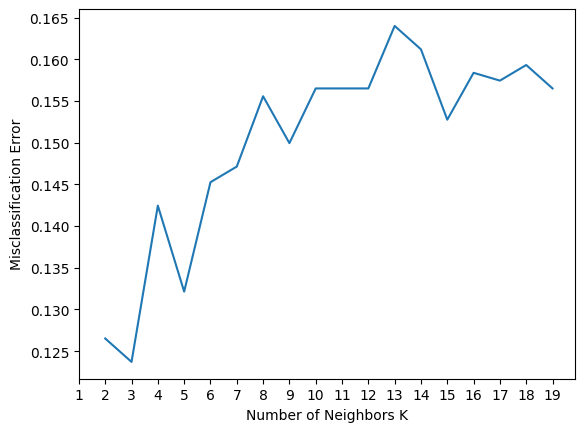

In [ ]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(2,20,1), MCE)
plt.xlabel('Number of Neighbors K')
plt.xticks(np.arange(1, 20, 1))

plt.ylabel('Misclassification Error')
plt.show()


For the Value of K=3, misclassififcation Error is minimum, hence we can consider the K=3, the best

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_train)

In [ ]:
#check metric
knn.metric

'minkowski'

In [ ]:
#model Knn Train score
knn.score(X_train, y_train)

0.8762886597938144

In [ ]:
#model Knn Test score
knn.score(X_test, y_test)

0.8165938864628821

In [ ]:
#metrics score
knn_score_before_hyperparameter=get_metrics_score(knn)

Accuracy on training set :  0.8762886597938144
Accuracy on test set :  0.8165938864628821
Recall on training set :  0.9274193548387096
Recall on test set :  0.8840125391849529
Precision on training set :  0.8984375
Precision on test set :  0.8571428571428571
F1 Score on training set :  0.9126984126984127
F1 Score on test set :  0.8703703703703702


In [ ]:
#redefine the Knn Value for the Grid search

knn = KNeighborsClassifier()

In [ ]:
#use grid search for the Model selection parameters for KNN model - Hyperparamter of  KNN MODEL

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_


In [ ]:
#parameter for best_knn
best_knn

KNeighborsClassifier(n_neighbors=9)

In [ ]:
#check parameteres
best_knn.metric

'minkowski'

In [ ]:
y_pred_knn=best_knn.predict(X_train)

In [ ]:
#metric model score for KNN after hyper parameter
knn_score_after_hyperparameter=get_metrics_score(best_knn)

Accuracy on training set :  0.8500468603561387
Accuracy on test set :  0.8318777292576419
Recall on training set :  0.918010752688172
Recall on test set :  0.9059561128526645
Precision on training set :  0.8734015345268542
Precision on test set :  0.8601190476190477
F1 Score on training set :  0.8951507208387942
F1 Score on test set :  0.8824427480916031


In [ ]:
#model score for train
best_knn_score_train= best_knn.score(X_train, y_train)
best_knn_score_train

0.8500468603561387

In [ ]:
#model score for test
best_knn_score_test= best_knn.score(X_test, y_test)
best_knn_score_test

0.8318777292576419

In [ ]:
!pip install scikit-learn==1.2.0

In [ ]:
from sklearn.neighbors import KNeighborsTransformer

Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. This parameter is expected to be positive.

In [ ]:
#Naive bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
#predict
y_pred_nb = nb.predict(X_train)

In [ ]:
nb.score(X_train, y_train)

0.8284910965323337

In [ ]:
#nb score of test data
nb.score(X_test, y_test)

0.8449781659388647

In [ ]:
#metric of the naive model before hyper parameter
nb_score_before_hyperparameter=get_metrics_score(nb)

Accuracy on training set :  0.8284910965323337
Accuracy on test set :  0.8449781659388647
Recall on training set :  0.8830645161290323
Recall on test set :  0.9028213166144201
Precision on training set :  0.8725099601593626
Precision on test set :  0.8780487804878049
F1 Score on training set :  0.8777555110220441
F1 Score on test set :  0.8902627511591962


In [ ]:
##use grid search for the Model selection parameters for Naive model
from sklearn.naive_bayes import GaussianNB  # Or another Naive Bayes variant
from sklearn.model_selection import GridSearchCV

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Example for GaussianNB
}

GNN_model = GaussianNB()  # Replace with your chosen Naive Bayes model
GNN_model_grid = GridSearchCV(estimator=GNN_model, param_grid=param_grid, cv=5, scoring='accuracy')  # Adjust cv and scoring as needed
GNN_model_grid.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [ ]:
best_params = GNN_model_grid.best_params_
best_model = GNN_model_grid.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_model)

Best Parameters: {'var_smoothing': 1e-09}
Best Estimator: GaussianNB()


In [ ]:
#model score for train
GNN_model_grid_Train= GNN_model_grid.score(X_train, y_train)
GNN_model_grid_Train

0.8284910965323337

In [ ]:
#model score for Test
GNN_model_grid_Test= GNN_model_grid.score(X_test, y_test)
GNN_model_grid_Test

0.8449781659388647

In [ ]:
#metric of the model score of the naive model after hyper parameter
GNN_score_after_hyperparameter=get_metrics_score(GNN_model_grid)

Accuracy on training set :  0.8284910965323337
Accuracy on test set :  0.8449781659388647
Recall on training set :  0.8830645161290323
Recall on test set :  0.9028213166144201
Precision on training set :  0.8725099601593626
Precision on test set :  0.8780487804878049
F1 Score on training set :  0.8777555110220441
F1 Score on test set :  0.8902627511591962


In [ ]:
#Bagging
bag_model = BaggingClassifier(random_state=42)
bag_model.fit(X_train, y_train)


BaggingClassifier(random_state=42)

In [ ]:
#metrics-model score before the hyper parameter
bag_model_score_before_hyperparameter=get_metrics_score(bag_model)

Accuracy on training set :  0.9887535145267105
Accuracy on test set :  0.8253275109170306
Recall on training set :  0.9905913978494624
Recall on test set :  0.8652037617554859
Precision on training set :  0.9932614555256065
Precision on test set :  0.8817891373801917
F1 Score on training set :  0.9919246298788694
F1 Score on test set :  0.8734177215189873


In [ ]:
bag_model.score(X_train, y_train)

0.9887535145267105

In [ ]:
bag_model.score(X_test, y_test)

0.8253275109170306

In [ ]:
#grid search for bagging classifer
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

grid_search = GridSearchCV(bag_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=42),
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
# best parameters and best estimator:

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 50}


In [ ]:
#model score for train
bagging_model_grid_Train= grid_search.score(X_train, y_train)
bagging_model_grid_Train

0.9428303655107779

In [ ]:
#model score for test
bagging_model_grid_Test= grid_search.score(X_test, y_test)
bagging_model_grid_Test

0.8384279475982532

In [ ]:
#Bagging model score after the hyper parameter
bag_model_score_after_hyperparameter=get_metrics_score(grid_search)

Accuracy on training set :  0.9428303655107779
Accuracy on test set :  0.8384279475982532
Recall on training set :  0.9825268817204301
Recall on test set :  0.9310344827586207
Precision on training set :  0.938382541720154
Precision on test set :  0.8510028653295129
F1 Score on training set :  0.9599474720945502
F1 Score on test set :  0.8892215568862275


In [ ]:
#Boosting
boost_model = AdaBoostClassifier()
boost_model.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
boost_model.score(X_train, y_train)

0.8369259606373008

In [ ]:
boost_model.score(X_test, y_test)

0.834061135371179

In [ ]:
#metrics-model score before the hyper parameter
boost_model_score_before_hyperparameter=get_metrics_score(boost_model)

Accuracy on training set :  0.8369259606373008
Accuracy on test set :  0.834061135371179
Recall on training set :  0.9005376344086021
Recall on test set :  0.9028213166144201
Precision on training set :  0.8701298701298701
Precision on test set :  0.8648648648648649
F1 Score on training set :  0.8850726552179655
F1 Score on test set :  0.8834355828220859


In [ ]:
#hyperparameter tuning using GridSearchCV for an AdaBoostClassifier model
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search_ada = GridSearchCV(boost_model, param_grid, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
best_params = grid_search_ada.best_params_
best_model = grid_search_ada.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}


In [ ]:
#model score for train
boost_model_grid_Train= grid_search_ada.score(X_train, y_train)
boost_model_grid_Train

0.8275538894095595

In [ ]:
#model score for test
boost_model_grid_Test= grid_search_ada.score(X_test, y_test)
boost_model_grid_Test

0.8427947598253275

In [ ]:
#metrics after hyper parameter on boosting model
boost_model_score_after_hyperparameter=get_metrics_score(grid_search_ada)

Accuracy on training set :  0.8275538894095595
Accuracy on test set :  0.8427947598253275
Recall on training set :  0.9206989247311828
Recall on test set :  0.9247648902821317
Precision on training set :  0.845679012345679
Precision on test set :  0.8600583090379009
F1 Score on training set :  0.8815958815958815
F1 Score on test set :  0.891238670694864


###Model Performance evaluation
- Check the confusion matrix and classification metrics for all the models (for both train and test dataset) - ROC-AUC score and plot the curve - Comment on all the model performance

Evaluating Models using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

# Define your models
models = {
    "KNN": best_knn,
    "Naive Bayes":GNN_model_grid,
    "Bagging model": grid_search,
    "Boosting model": grid_search_ada
}

# Define the cross-validation strategy (Stratified k-Fold)
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

# Evaluate each model using cross-validation
for model_name, model in models.items():
    # Define the scoring metrics
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    # Perform cross-validation
    cv_results = cross_validate(model, X_train, y_train, cv=skf, scoring=scoring)

    # Collect the mean and standard deviation for each metric
    print(f"Results for {model_name}:")
    for metric in scoring:
        print(f"{metric}: {cv_results['test_' + metric].mean():.4f} (+/- {cv_results['test_' + metric].std():.4f})")

    print("\n")




Results for KNN:
accuracy: 0.8182 (+/- 0.0233)
precision: 0.8475 (+/- 0.0138)
recall: 0.9019 (+/- 0.0342)
f1: 0.8734 (+/- 0.0179)
roc_auc: 0.8567 (+/- 0.0341)


Results for Naive Bayes:
accuracy: 0.8219 (+/- 0.0163)
precision: 0.8675 (+/- 0.0117)
recall: 0.8790 (+/- 0.0229)
f1: 0.8731 (+/- 0.0126)
roc_auc: 0.8784 (+/- 0.0211)


Results for Bagging model:
accuracy: 0.8079 (+/- 0.0276)
precision: 0.8451 (+/- 0.0164)
recall: 0.8871 (+/- 0.0310)
f1: 0.8654 (+/- 0.0205)
roc_auc: 0.8688 (+/- 0.0251)


Results for Boosting model:
accuracy: 0.8172 (+/- 0.0157)
precision: 0.8417 (+/- 0.0168)
recall: 0.9099 (+/- 0.0328)
f1: 0.8739 (+/- 0.0123)
roc_auc: 0.8801 (+/- 0.0183)




In [ ]:
# Sample code for evaluating one model
from sklearn.model_selection import cross_val_score

# For example, cross-validate the Random Forest model
KNN_cv_scores = cross_val_score(best_knn, X_train, y_train, cv=skf, scoring='accuracy')

print(f"KNN CV Accuracy: {KNN_cv_scores.mean():.4f} (+/- {KNN_cv_scores.std():.4f})")

KNN CV Accuracy: 0.8182 (+/- 0.0233)


In [ ]:
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)


In [ ]:
from sklearn.metrics import confusion_matrix

def classification_report_metrics(y_true, y_pred):
    """
    Calculate and print the classification report metrics.

    Parameters:
    y_true (list or array): True labels
    y_pred (list or array): Predicted labels

    Returns:
    dict: A dictionary containing accuracy, precision, recall, and f1-score
    """

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Extract true positives, false positives, false negatives, true negatives
    tn, fp, fn, tp = cm.ravel()

    # Calculate accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Calculate precision
    precision = tp / (tp + fp)

    # Calculate recall
    recall = tp / (tp + fn)

    # Calculate F1 score
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Print the classification report
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1_score:.2f}")

    # Return the metrics as a dictionary
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }




In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)

In [ ]:
#knn.neighbour
best_knn.n_neighbors

9

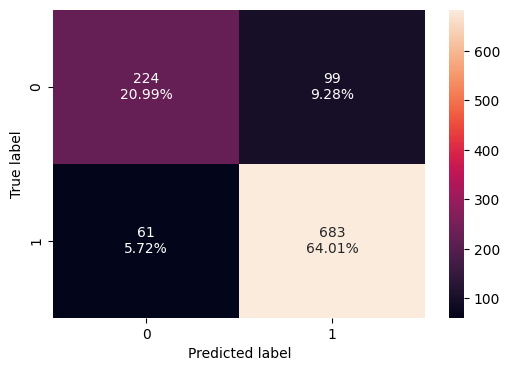

In [ ]:
#confusion matrix for the Train Data of KNN by **Hyperparameter Tuning**:
confusion_matrix_sklearn(best_knn,X_train, y_train)

In [ ]:
#classification report for the Train Data of KNN by **Hyperparameter Tuning**:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79       323
         1.0       0.90      0.93      0.91       744

    accuracy                           0.88      1067
   macro avg       0.86      0.84      0.85      1067
weighted avg       0.87      0.88      0.87      1067



In [ ]:
#Metrics for KNN  for Train Data
knn_metrics=classification_report_metrics(y_train, y_pred_knn)

Accuracy: 0.88
Precision: 0.90
Recall: 0.93
F1-Score: 0.91


In [ ]:
!pip install scikit-learn==1.2.0

In [ ]:
#Get predicted probabilities for the positive class

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = best_knn.predict_proba(X_train)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

# Calculate AUC score
roc_auc = auc(fpr, tpr)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9121766703285729


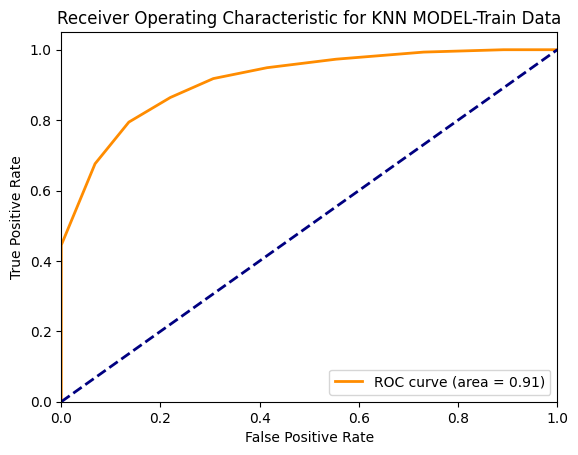

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN MODEL-Train Data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#fit the Model for the Test  Data of KNN by **Hyperparameter Tuning**:
y_pred_knn_test = best_knn.predict(X_test)

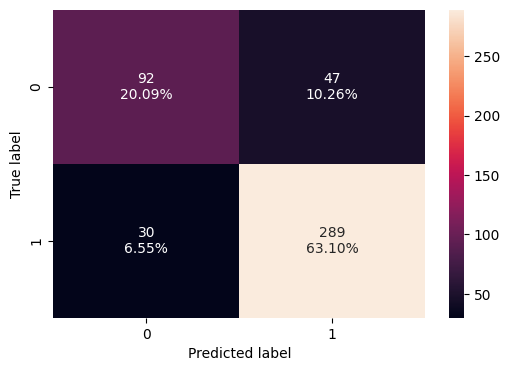

In [ ]:
#confusion matrix for the Test Data of KNN by **Hyperparameter Tuning**:
confusion_matrix_sklearn(best_knn,X_test, y_test)

In [ ]:
#classification report of the Test Data set
print(classification_report(y_test, y_pred_knn_test))

              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70       139
         1.0       0.86      0.91      0.88       319

    accuracy                           0.83       458
   macro avg       0.81      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458



In [ ]:
#Get predicted probabilities for the positive class

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
roc_auc = auc(fpr, tpr)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8888726009787782


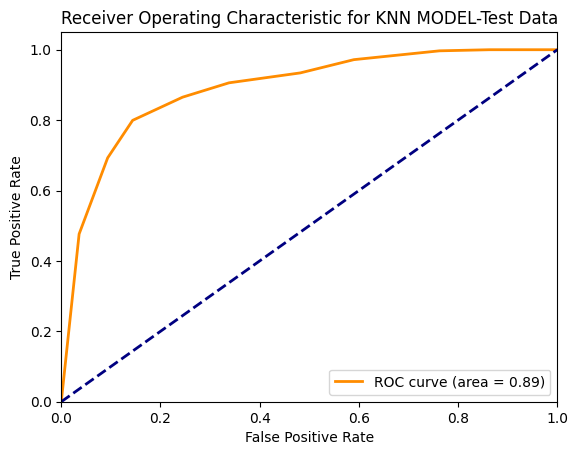

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN MODEL-Test Data')
plt.legend(loc="lower right")
plt.show()

Naive Bayes - Model

In [ ]:
GNN_model_grid

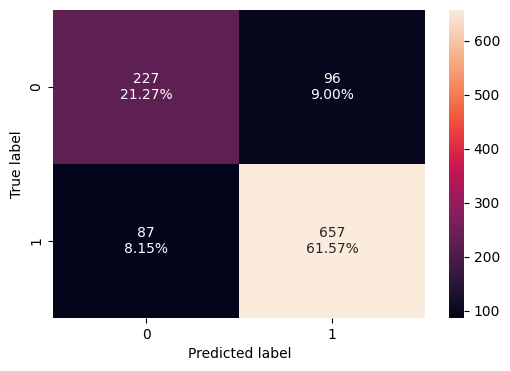

In [ ]:
#confusion matrix for the Train Data of Naive Bayes Model by **Hyperparameter Tuning**:
confusion_matrix_sklearn(GNN_model_grid,X_train, y_train)

In [ ]:
#predict the y Value for the Train Data of Gaussian NAIVE BAYES MODE
y_pred_GNN = GNN_model_grid.predict(X_train)

In [ ]:
#classification report for the Train Data of NAIVE BAYES MODEL by **Hyperparameter Tuning**:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_GNN))

              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71       323
         1.0       0.87      0.88      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.79      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [ ]:
#Get predicted probabilities for the positive class

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = GNN_model_grid.predict_proba(X_train)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

# Calculate AUC score
roc_auc = auc(fpr, tpr)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8812793368620794


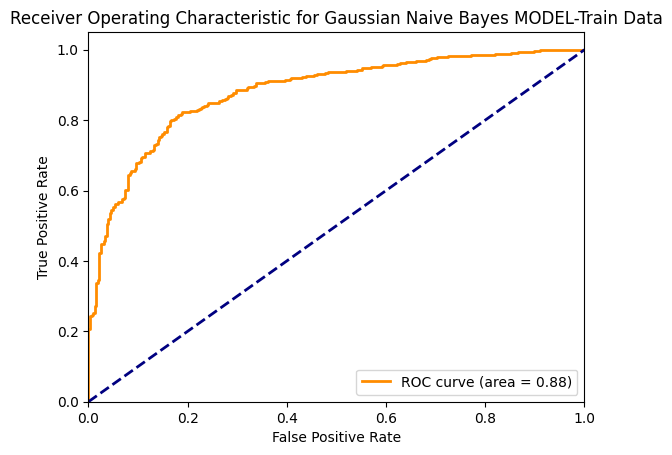

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Gaussian Naive Bayes MODEL-Train Data')
plt.legend(loc="lower right")
plt.show()

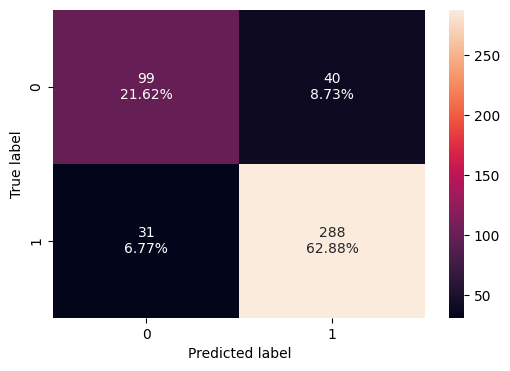

In [ ]:
#confusion matrix for the Test Data of Naive Bayes Model by **Hyperparameter Tuning**:
confusion_matrix_sklearn(GNN_model_grid,X_test, y_test)

In [ ]:
#predict the y Value for the Test Data of Gaussian NAIVE BAYES MODE
y_pred_GNN_Test = GNN_model_grid.predict(X_test)

In [ ]:
#classification report for the Test Data of NAIVE BAYES MODEL by **Hyperparameter Tuning**:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_GNN_Test))

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.74       139
         1.0       0.88      0.90      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.81      0.81       458
weighted avg       0.84      0.84      0.84       458



In [ ]:
#Get predicted probabilities for the positive class

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = GNN_model_grid.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
roc_auc = auc(fpr, tpr)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8972959563383776


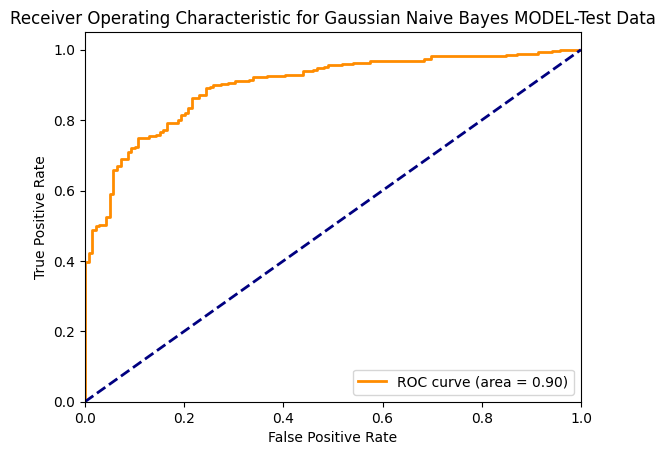

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Gaussian Naive Bayes MODEL-Test Data')
plt.legend(loc="lower right")
plt.show()

Bagging Model

In [ ]:
grid_search  bagging_model_grid_Train

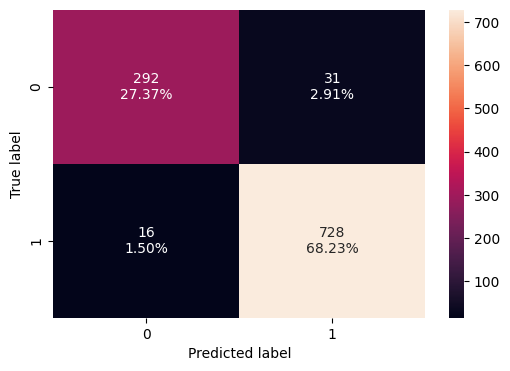

In [ ]:
#confusion matrix for the Train Data of Bagging Model by **Hyperparameter Tuning**:
confusion_matrix_sklearn(grid_search,X_train, y_train)

In [ ]:
#predict the y Value for the Train Data of Bagging Model
y_pred_Bag_Train = grid_search.predict(X_train)

In [ ]:
#classification report for the Train Data of Bagging MODEL by **Hyperparameter Tuning**:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_Bag_Train))

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93       323
         1.0       0.96      0.98      0.97       744

    accuracy                           0.96      1067
   macro avg       0.95      0.94      0.95      1067
weighted avg       0.96      0.96      0.96      1067



In [ ]:
#Get predicted probabilities for the positive class

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = grid_search.predict_proba(X_train)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_Bag_Train)

# Calculate AUC score
roc_auc = auc(fpr, tpr)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9412596957288858


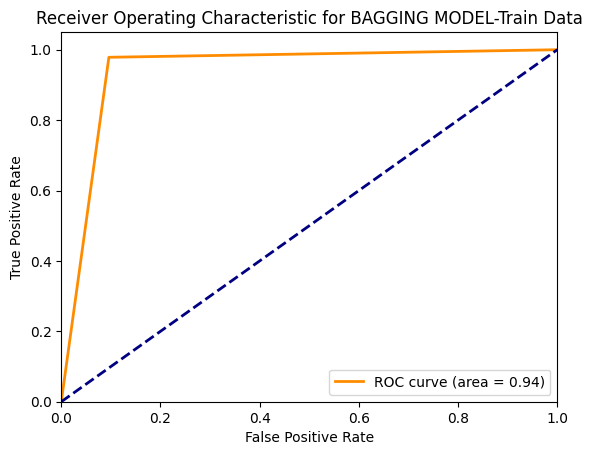

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for BAGGING MODEL-Train Data')
plt.legend(loc="lower right")
plt.show()

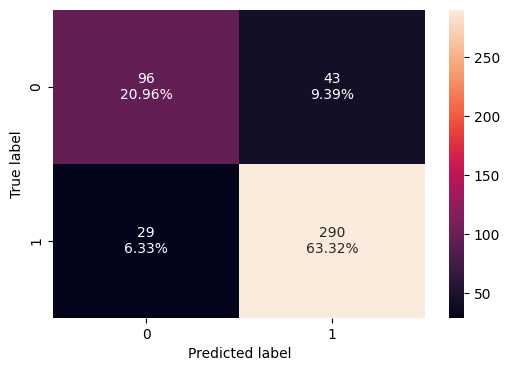

In [ ]:
#confusion matrix for the Test Data of Bagging Model by **Hyperparameter Tuning**:
confusion_matrix_sklearn(grid_search,X_test, y_test)

In [ ]:
#predict the y Value for the Test Data of Bagging Model
y_pred_Bag_Test = grid_search.predict(X_test)

In [ ]:
#classification report for the Test Data of Bagging MODEL by **Hyperparameter Tuning**:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_Bag_Test))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73       139
         1.0       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458



In [ ]:
#Metrics for Test Data of Bagging MODEL MODEL
Bag_metrics_Test=classification_report_metrics(y_test, y_pred_Bag_Test)

Accuracy: 0.84
Precision: 0.87
Recall: 0.91
F1-Score: 0.89


In [ ]:
#Get predicted probabilities for the positive class

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_Bag_Test)

# Calculate AUC score
roc_auc = auc(fpr, tpr)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.7998691955526487


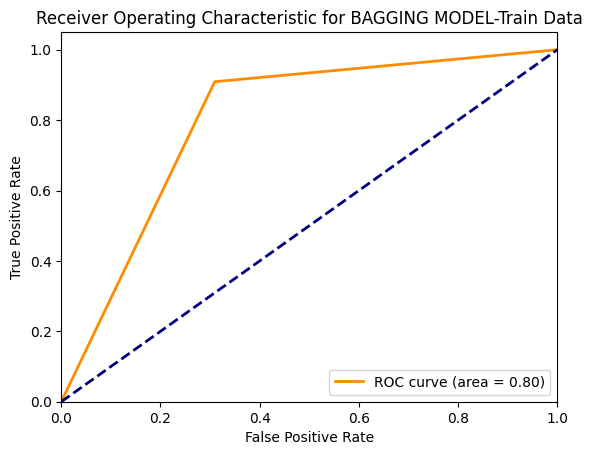

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for BAGGING MODEL-Train Data')
plt.legend(loc="lower right")
plt.show()

Boosting Model

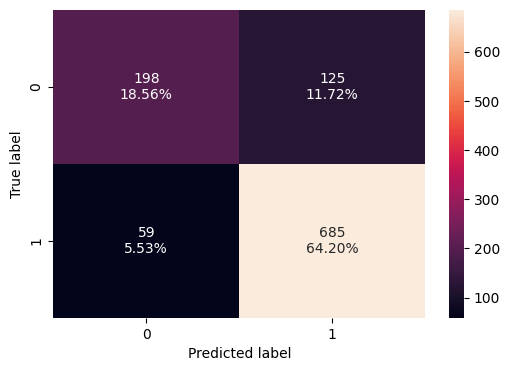

In [ ]:
#confusion matrix for the Train Data of Boosting Model by **Hyperparameter Tuning**:
confusion_matrix_sklearn(grid_search_ada,X_train, y_train)

In [ ]:
#predict the y Value for the Train Data of Boostinh Model
y_pred_Boost_Train = grid_search_ada.predict(X_train)

In [ ]:
#classification report for the Train Data of Boosting MODEL by **Hyperparameter Tuning**:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_Boost_Train))

              precision    recall  f1-score   support

         0.0       0.77      0.61      0.68       323
         1.0       0.85      0.92      0.88       744

    accuracy                           0.83      1067
   macro avg       0.81      0.77      0.78      1067
weighted avg       0.82      0.83      0.82      1067



In [ ]:
#Metrics for Train Data of Boosting MODEL MODEL
Bag_metrics_Train=classification_report_metrics(y_train, y_pred_Boost_Train)

Accuracy: 0.83
Precision: 0.85
Recall: 0.92
F1-Score: 0.88


In [ ]:
#Get predicted probabilities for the positive class

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = grid_search_ada.predict_proba(X_train)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_Boost_Train)

# Calculate AUC score
roc_auc = auc(fpr, tpr)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.7668510103532075


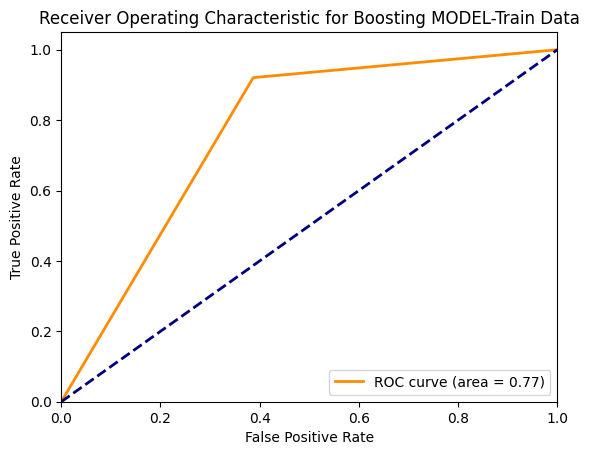

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Boosting MODEL-Train Data')
plt.legend(loc="lower right")
plt.show()

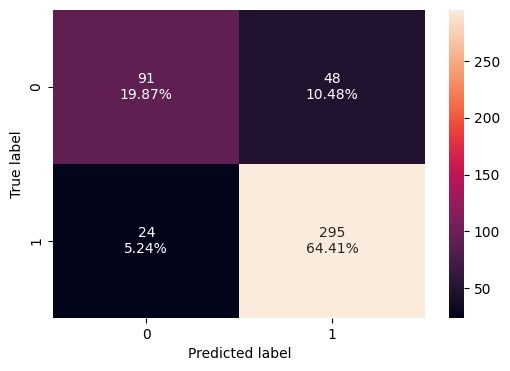

In [ ]:
#confusion matrix for the Test Data of Boosting Model by **Hyperparameter Tuning**:
confusion_matrix_sklearn(grid_search_ada,X_test, y_test)

In [ ]:
#predict the y Value for the Test Data of Boostinh Model
y_pred_Boost_Test = grid_search_ada.predict(X_test)

In [ ]:
#classification report for the Test Data of Boosting MODEL by **Hyperparameter Tuning**:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_Boost_Test))

              precision    recall  f1-score   support

         0.0       0.79      0.65      0.72       139
         1.0       0.86      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.83      0.79      0.80       458
weighted avg       0.84      0.84      0.84       458



In [ ]:
#Get predicted probabilities for the positive class

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = grid_search_ada.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_Boost_Test)

# Calculate AUC score
roc_auc = auc(fpr, tpr)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.7897205746374687


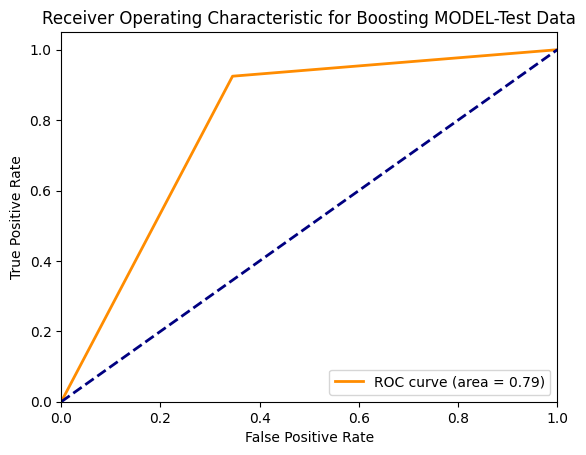

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Boosting MODEL-Test Data')
plt.legend(loc="lower right")
plt.show()

### Model Performance improvement
- Improve the model performance of bagging and boosting models by tuning the model

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
y_train.dtypes

dtype('float64')

In [ ]:
!pip install --upgrade scikit-learn joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 39.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.0
    Uninstalling scikit-learn-1.2.0:
      Successfully uninstalled scikit-learn-1.2.0


Bagging Models (e.g., Random Forest)
Hyperparameter Tuning:  methods used  Random Search to find the optimal parameters for the Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train) #fit the rf
#predict the model
y_pred_rf=rf.predict(X_train)
rf_f=rf.fit(X_train,y_train)


In [ ]:
#randdom forest model metric before the hyper tunnning
from sklearn.metrics import recall_score
rf_metrics_before_tuning=get_metrics_score(rf)



Accuracy on training set :  1.0
Accuracy on test set :  0.8449781659388647
Recall on training set :  1.0
Recall on test set :  0.9090909090909091
Precision on training set :  1.0
Precision on test set :  0.8734939759036144
F1 Score on training set :  1.0
F1 Score on test set :  0.8909370199692781


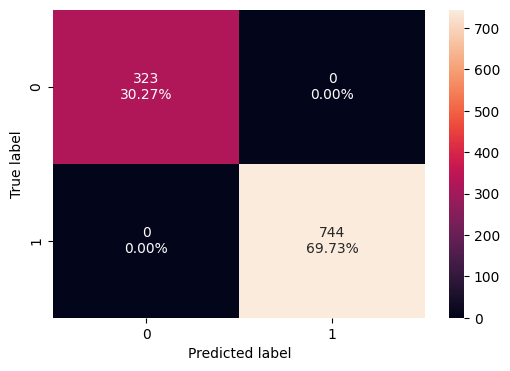

In [ ]:
##print the conufsion  matrix of the Train before tuning
confusion_matrix_sklearn(rf,X_train, y_train)

In [ ]:
#classification report before tunning
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       323
         1.0       1.00      1.00      1.00       744

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

#function to display the Roc_Auc Curve
def plot_auc_curve(y_true, y_pred_proba, title='Receiver Operating Characteristic'):
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

    # Calculate AUC score
    roc_auc = auc(fpr, tpr)

    # Plot the AUC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc




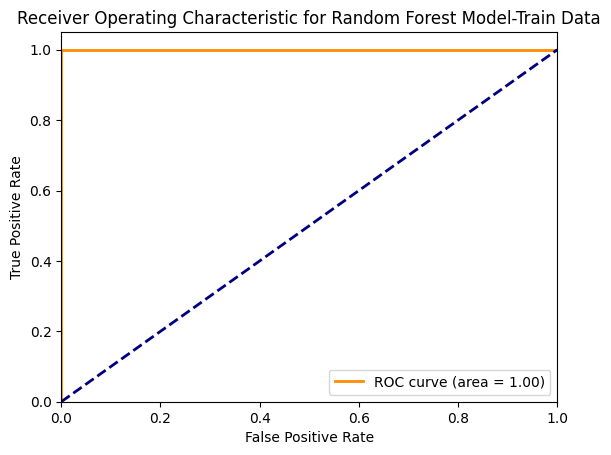

ROC-AUC Score: 1.0


In [ ]:
#
# Get predicted probabilities for the positive class
y_pred_proba = rf.predict_proba(X_train)[:, 1]

# Call the function with the test labels and predicted probabilities
roc_auc = plot_auc_curve(y_train, y_pred_proba, 'Receiver Operating Characteristic for Random Forest Model-Train Data')
print("ROC-AUC Score:", roc_auc)

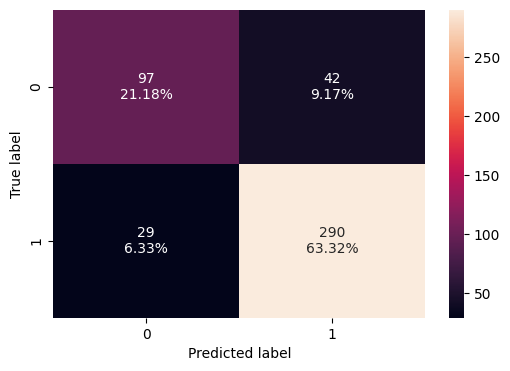

In [ ]:
#test data
##print the conufsion  matrix of the Test data before tuning
confusion_matrix_sklearn(rf,X_test, y_test)

In [ ]:
#test predition of random forest model
y_pred_rf_test=rf.predict(X_test)

In [ ]:
#classification report before tunning of test data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73       139
         1.0       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458



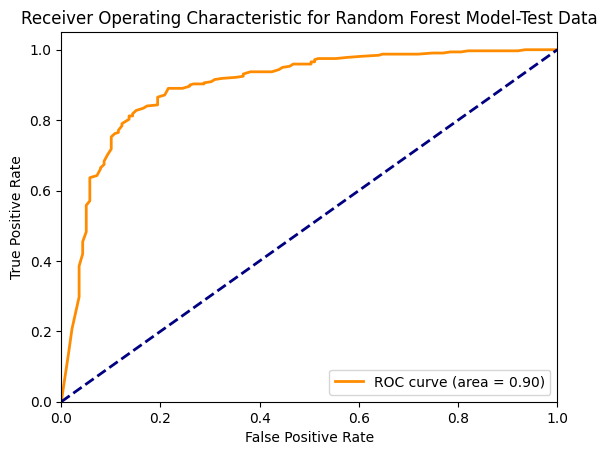

ROC-AUC Score: 0.8971831938837646


In [ ]:
#roc_auc score and curve for the test data

# Get predicted probabilities for the positive class
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Call the function with the test labels and predicted probabilities
roc_auc = plot_auc_curve(y_test, y_pred_proba, 'Receiver Operating Characteristic for Random Forest Model-Test Data')
print("ROC-AUC Score:", roc_auc)

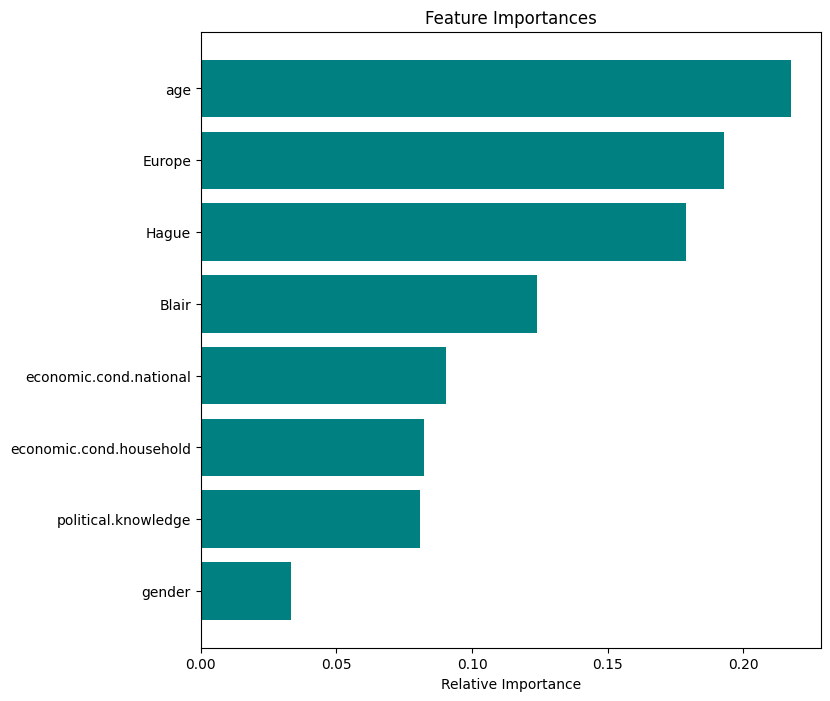

In [ ]:
#important feature as per Random Forest Tuned

importances = rf_f.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#hyper tunning model of the random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200], #Number of trees (
    'max_features': ['auto', 'sqrt'], #maximum features
    'max_depth': [None, 10, 20, 30],  #Maximum depth of each tree
    'min_samples_split': [2, 5, 10], #Minimum samples required to split a nod
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestClassifier(random_state=1)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)




In [ ]:
# Fit the model
grid_search_rf.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Print the best parameters
print("Best parameters for Random Forest: ", grid_search_rf.best_params_)

# Evaluate on train and test data using the best estimator
rf_best = grid_search_rf.best_estimator_
train_accuracy_rf = rf_best.score(X_train, y_train)
test_accuracy_rf = rf_best.score(X_test, y_test)
print(f"Train Accuracy: {train_accuracy_rf}, Test Accuracy: {test_accuracy_rf}")

Best parameters for Random Forest:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Train Accuracy: 0.9109653233364574, Test Accuracy: 0.8318777292576419


In [ ]:
#get metrics of the after hyper tunning of random forest
rf_metrics_after_tuning=get_metrics_score(rf_best)

Accuracy on training set :  0.9109653233364574
Accuracy on test set :  0.8318777292576419
Recall on training set :  0.956989247311828
Recall on test set :  0.9184952978056427
Precision on training set :  0.9187096774193548
Precision on test set :  0.8517441860465116
F1 Score on training set :  0.9374588545095458
F1 Score on test set :  0.8838612368024134


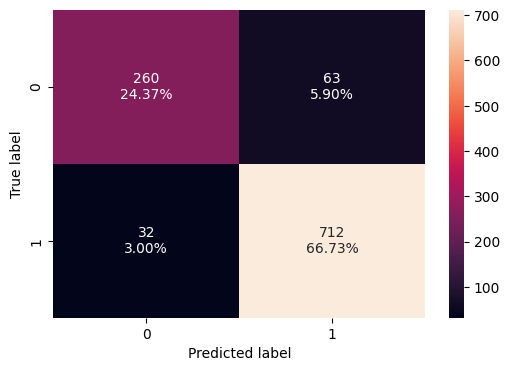

In [ ]:
#print the conufsion  matrix of the Train
confusion_matrix_sklearn(rf_best,X_train, y_train)

In [ ]:
#print Clasification matric of the  Train Data
from sklearn.metrics import classification_report
print(classification_report(y_train, rf_best.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.89      0.80      0.85       323
         1.0       0.92      0.96      0.94       744

    accuracy                           0.91      1067
   macro avg       0.90      0.88      0.89      1067
weighted avg       0.91      0.91      0.91      1067



In [ ]:
  #pedict y value of train Data
  y_pred_rf_train = rf_best.predict(X_train)

In [ ]:
#Get predicted probabilities for the positive class

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = rf_best.predict_proba(X_train)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train,y_pred_proba)

# Calculate AUC score
roc_auc = auc(fpr, tpr)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9722028030227371


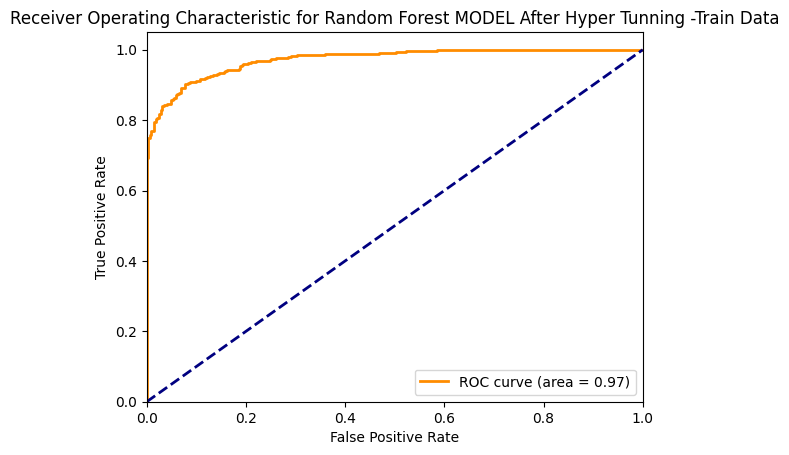

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest MODEL After Hyper Tunning -Train Data')
plt.legend(loc="lower right")
plt.show()

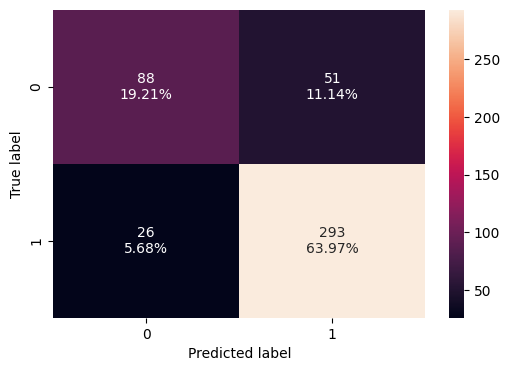

In [ ]:
#print the conufsion  matrix of the test
confusion_matrix_sklearn(rf_best,X_test, y_test)

In [ ]:
#print Clasification matric of the  test Data
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_best.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.77      0.63      0.70       139
         1.0       0.85      0.92      0.88       319

    accuracy                           0.83       458
   macro avg       0.81      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458



In [ ]:
  #pedict y value of test Data
  y_pred_rf_test = rf_best.predict(X_test)

In [ ]:
#print Roc-Auc value for the test data
y_pred_proba = rf_best.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


# Calculate AUC score
roc_auc = auc(fpr, tpr)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8995737579215625


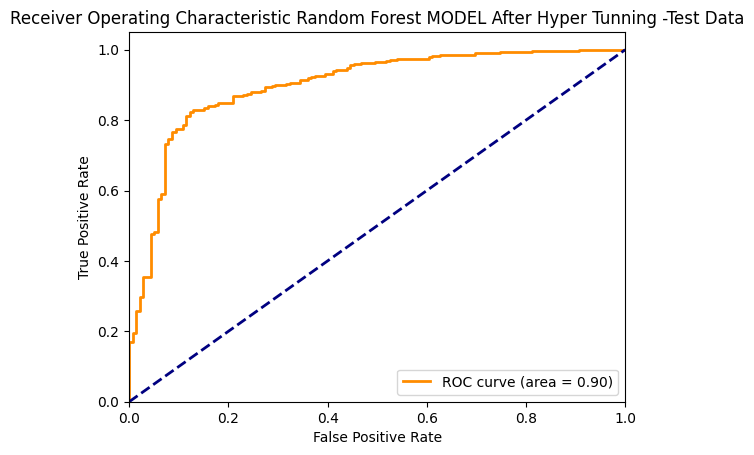

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Random Forest MODEL After Hyper Tunning -Test Data')
plt.legend(loc="lower right")
plt.show()

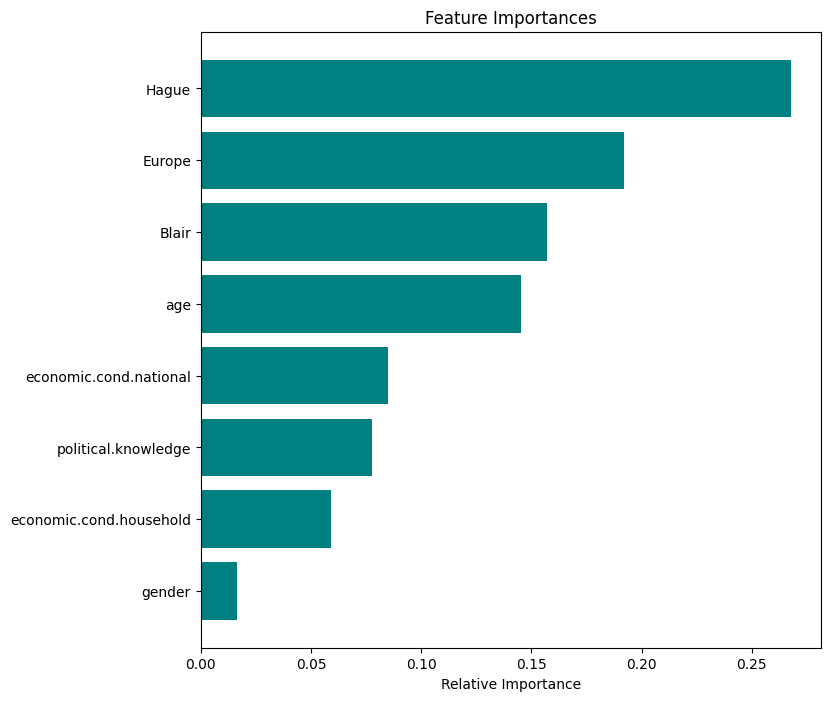

In [ ]:
#important feature as per Random Forest Tuned

importances = rf_best.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 boosting models

 Gradient Boosting



 XGBoost

 AdaBoost

###AdaBoost Classifier

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
#predict y value for Train Dataa
y_pred_abc_train = abc.predict(X_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8369259606373008
Accuracy on test set :  0.834061135371179
Recall on training set :  0.9005376344086021
Recall on test set :  0.9028213166144201
Precision on training set :  0.8701298701298701
Precision on test set :  0.8648648648648649
F1 Score on training set :  0.8850726552179655
F1 Score on test set :  0.8834355828220859


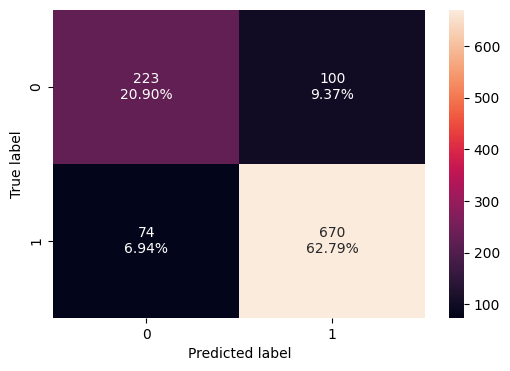

In [ ]:
#confusion matrix of the Train data
confusion_matrix_sklearn(abc,X_train, y_train)

In [ ]:
#classification report of Train Data
print(classification_report(y_train, y_pred_abc_train))

              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72       323
         1.0       0.87      0.90      0.89       744

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.84      0.83      1067



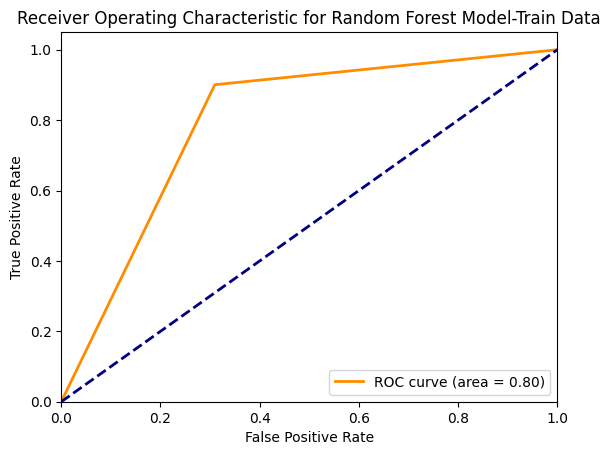

ROC-AUC Score: 0.7954700555943939


In [ ]:
##roc_auc score and curve for the Train data

# Get predicted probabilities for the positive class
y_pred_proba = abc.predict_proba(X_train)[:, 1]

# Call the function with the test labels and predicted probabilities
roc_auc = plot_auc_curve(y_train, y_pred_abc_train, 'Receiver Operating Characteristic for Random Forest Model-Train Data')
print("ROC-AUC Score:", roc_auc)


In [ ]:
#predict y value for Test Dataa
y_pred_abc_test = abc.predict(X_test)

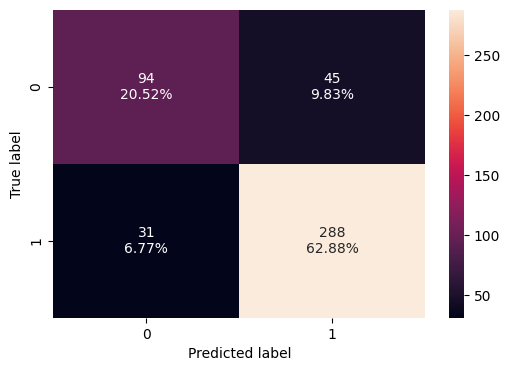

In [ ]:
#confusion matrix of the test data
confusion_matrix_sklearn(abc,X_test, y_test)

In [ ]:
#claassification report of the Test data
print(classification_report(y_test, y_pred_abc_test))

              precision    recall  f1-score   support

         0.0       0.75      0.68      0.71       139
         1.0       0.86      0.90      0.88       319

    accuracy                           0.83       458
   macro avg       0.81      0.79      0.80       458
weighted avg       0.83      0.83      0.83       458



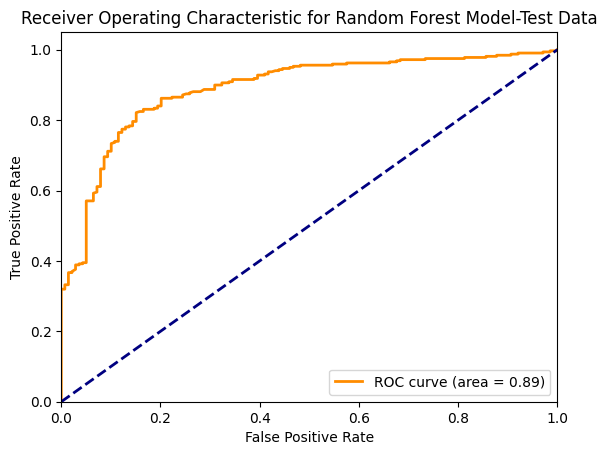

ROC-AUC Score: 0.8889966396788526


In [ ]:
#roc_auc score and curve for the Test data
# Get predicted probabilities for the positive class
y_pred_proba = abc.predict_proba(X_test)[:, 1]

# Call the function with the test labels and predicted probabilities
roc_auc = plot_auc_curve(y_test, y_pred_proba, 'Receiver Operating Characteristic for Random Forest Model-Test Data')
print("ROC-AUC Score:", roc_auc)


###Gradient Boosting Classifier


In [ ]:
#
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
#predict the y Variable
y_pred_gbc_train = gbc.predict(X_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8922211808809747
Accuracy on test set :  0.8406113537117904
Recall on training set :  0.9368279569892473
Recall on test set :  0.9059561128526645
Precision on training set :  0.9111111111111111
Precision on test set :  0.8704819277108434
F1 Score on training set :  0.9237905897945659
F1 Score on test set :  0.8878648233486944


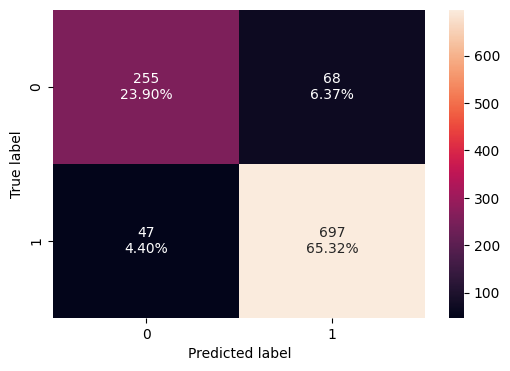

In [ ]:
#confusion matrix of Train Data
confusion_matrix_sklearn(gbc,X_train, y_train)

In [ ]:
#classfication report of Train Data
print(classification_report(y_train, y_pred_gbc_train))

              precision    recall  f1-score   support

         0.0       0.84      0.79      0.82       323
         1.0       0.91      0.94      0.92       744

    accuracy                           0.89      1067
   macro avg       0.88      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



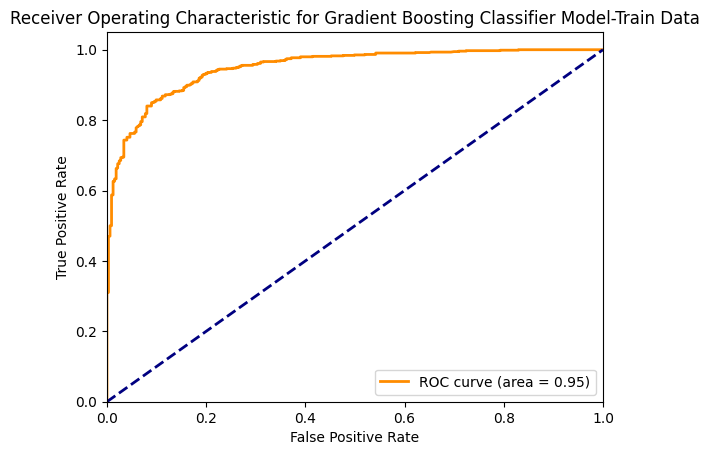

ROC-AUC Score: 0.9494324045407636


In [ ]:
##roc_auc score and curve for the Train data

# Get predicted probabilities for the positive class
y_pred_proba = gbc.predict_proba(X_train)[:, 1]

# Call the function with the test labels and predicted probabilities
roc_auc = plot_auc_curve(y_train, y_pred_proba, 'Receiver Operating Characteristic for Gradient Boosting Classifier Model-Train Data')
print("ROC-AUC Score:", roc_auc)

In [ ]:
#test data
#predict the y Variable
y_pred_gbc_test = gbc.predict(X_test)

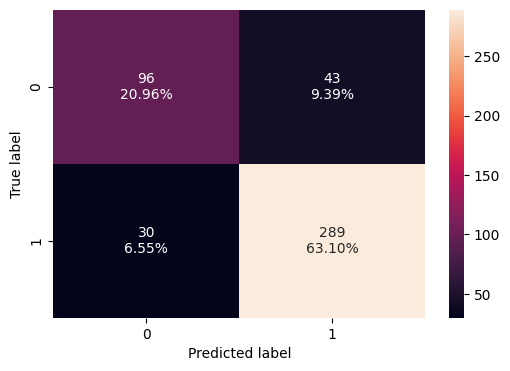

In [ ]:
#confusion of the Test Data
confusion_matrix_sklearn(gbc,X_test, y_test)

In [ ]:
#classification report of the Test data
print(classification_report(y_test, y_pred_gbc_test))

              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72       139
         1.0       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458



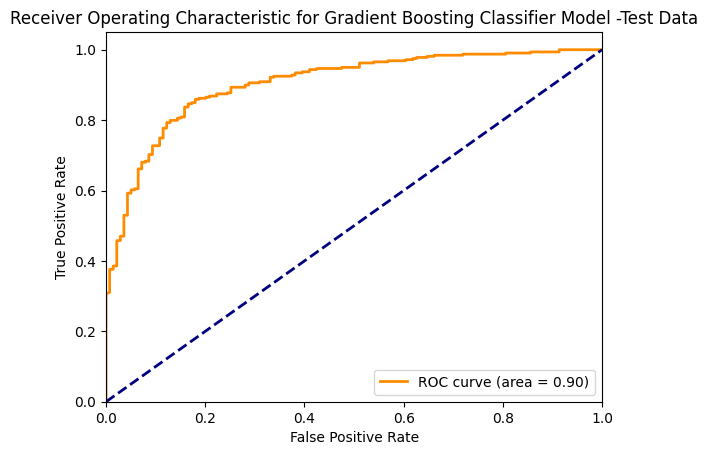

ROC-AUC Score: 0.9038700074423219


In [ ]:
#auc score and curve
#roc_auc score and curve for the test data

# Get predicted probabilities for the positive class
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

# Call the function with the test labels and predicted probabilities
roc_auc = plot_auc_curve(y_test, y_pred_proba, 'Receiver Operating Characteristic for Gradient Boosting Classifier Model -Test Data')
print("ROC-AUC Score:", roc_auc)



####XGBoost Classifier


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# predict the Y value
y_pred_xgb_train = xgb.predict(X_train)

In [ ]:
#metric score of the xgb model
xgb_score=get_metrics_score(xgb)


Accuracy on training set :  0.9943767572633552
Accuracy on test set :  0.8253275109170306
Recall on training set :  0.9932795698924731
Recall on test set :  0.8808777429467085
Precision on training set :  0.9986486486486487
Precision on test set :  0.8699690402476781
F1 Score on training set :  0.995956873315364
F1 Score on test set :  0.8753894080996886


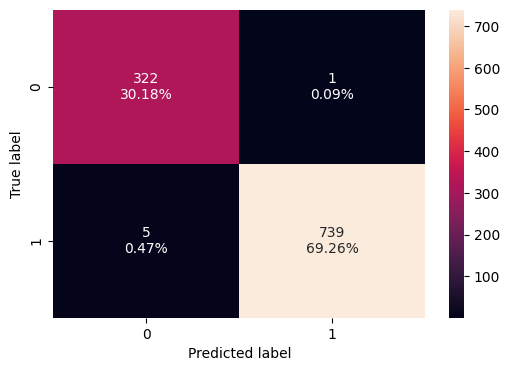

In [ ]:
#confusion matrix of the Train data
confusion_matrix_sklearn(xgb,X_train, y_train)

In [ ]:
#classification report
print(classification_report(y_train, y_pred_xgb_train))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       323
         1.0       1.00      0.99      1.00       744

    accuracy                           0.99      1067
   macro avg       0.99      1.00      0.99      1067
weighted avg       0.99      0.99      0.99      1067



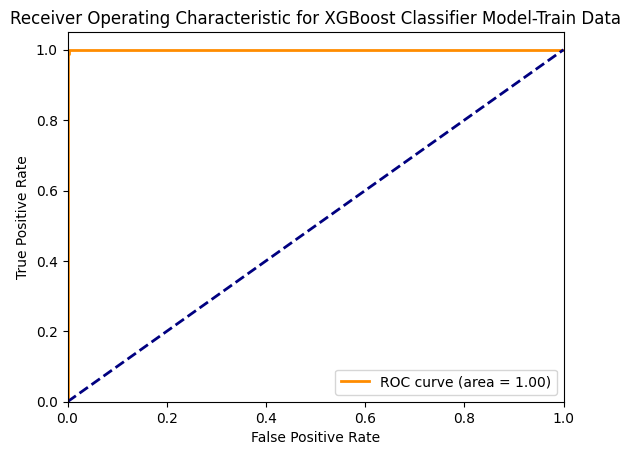

ROC-AUC Score: 0.9999667099437398


In [ ]:
#roc_auc score and curve for the Train data

# Get predicted probabilities for the positive class
y_pred_proba = xgb.predict_proba(X_train)[:, 1]

# Call the function with the test labels and predicted probabilities
roc_auc = plot_auc_curve(y_train, y_pred_proba, 'Receiver Operating Characteristic for XGBoost Classifier Model-Train Data')
print("ROC-AUC Score:", roc_auc)


In [ ]:
##test data
#predict the y value
y_pred_xgb_test = xgb.predict(X_test)

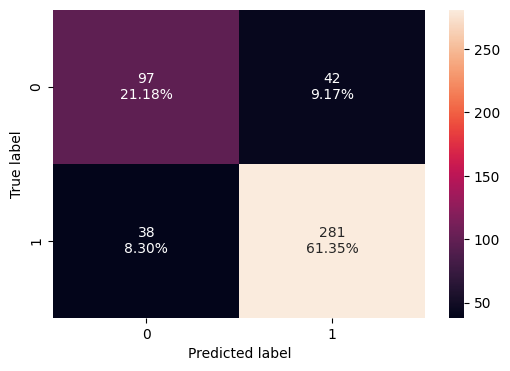

In [ ]:
#confusion matrix of the Test data
confusion_matrix_sklearn(xgb,X_test, y_test)

In [ ]:
#classification report for the Test data
print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71       139
         1.0       0.87      0.88      0.88       319

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.82      0.83      0.82       458



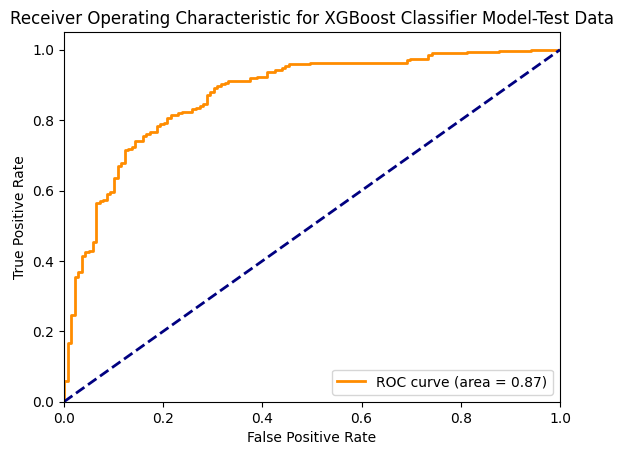

ROC-AUC Score: 0.873435420942243


In [ ]:
#roc_auc score and curve for the test data

# Get predicted probabilities for the positive class
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

# Call the function with the test labels and predicted probabilities
roc_auc = plot_auc_curve(y_test, y_pred_proba, 'Receiver Operating Characteristic for XGBoost Classifier Model-Test Data')
print("ROC-AUC Score:", roc_auc)




###HyperParameter Tunning

AdaBoost Classifier

In [ ]:
# Choose the type of classifier.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [ ]:
#get metrics of the after hyper tunning of AdaBoost Classifier
abc_tuned_score=get_metrics_score(abc_tuned)


Accuracy on training set :  0.788191190253046
Accuracy on test set :  0.7947598253275109
Recall on training set :  0.9583333333333334
Recall on test set :  0.9623824451410659
Precision on training set :  0.7852422907488987
Precision on test set :  0.7892030848329049
F1 Score on training set :  0.8631961259079903
F1 Score on test set :  0.867231638418079


In [ ]:
# predict the Y value of Train Data of AdaBoost Classifier
y_pred_abc_tuned_train = abc_tuned.predict(X_train)

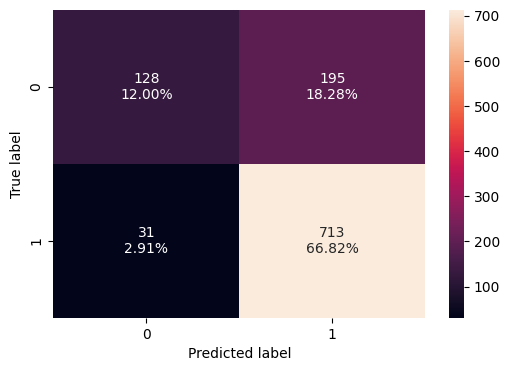

In [ ]:
#confusion matrix of the Train data of AdaBoost Classifier
confusion_matrix_sklearn(abc_tuned,X_train, y_train)

In [ ]:
#classification report of the Train data of AdaBoost Classifier
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_abc_tuned_train))

              precision    recall  f1-score   support

         0.0       0.81      0.40      0.53       323
         1.0       0.79      0.96      0.86       744

    accuracy                           0.79      1067
   macro avg       0.80      0.68      0.70      1067
weighted avg       0.79      0.79      0.76      1067



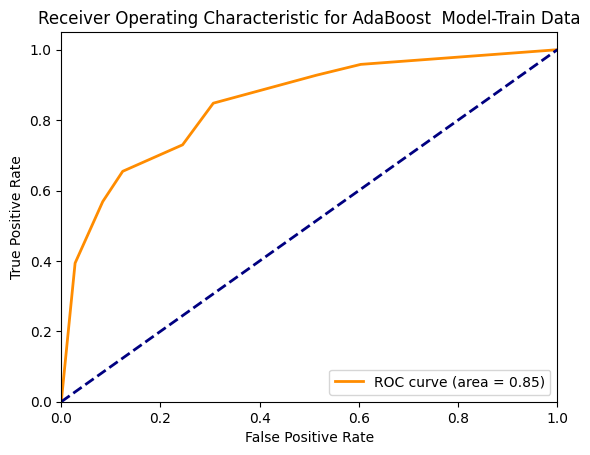

ROC-AUC Score: 0.8461812144212524


In [ ]:
#roc_auc score and curve for the Train data of AdaBoost Classifier

# Get predicted probabilities for the positive class
y_pred_proba = abc_tuned.predict_proba(X_train)[:, 1]

# Call the function with the test labels and predicted probabilities
roc_auc = plot_auc_curve(y_train, y_pred_proba, 'Receiver Operating Characteristic for AdaBoost  Model-Train Data')
print("ROC-AUC Score:", roc_auc)


In [ ]:
# predict the Y value of Test Data Data of AdaBoost Classifier
y_pred_abc_tuned_test = abc_tuned.predict(X_test)

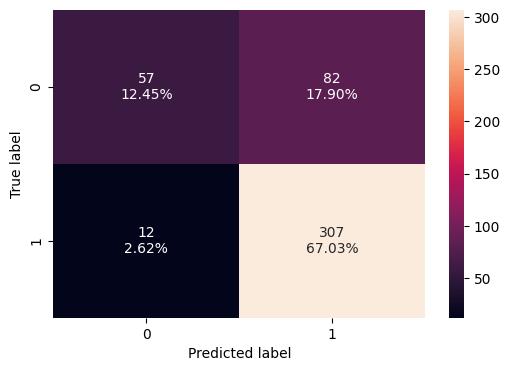

In [ ]:

#confusion matrix of the Test data of AdaBoost Classifier
confusion_matrix_sklearn(abc_tuned,X_test, y_test)

In [ ]:
#classification report of the Test data of AdaBoost Classifier
print(classification_report(y_test, y_pred_abc_tuned_test))

              precision    recall  f1-score   support

         0.0       0.83      0.41      0.55       139
         1.0       0.79      0.96      0.87       319

    accuracy                           0.79       458
   macro avg       0.81      0.69      0.71       458
weighted avg       0.80      0.79      0.77       458



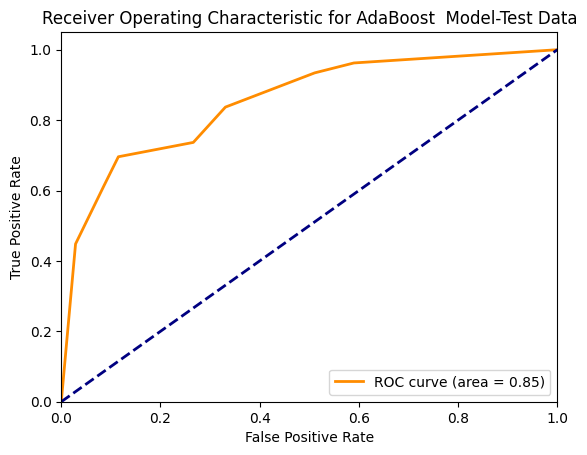

ROC-AUC Score: 0.851728648429219


In [ ]:
#roc_auc score and curve for the test data of AdaBoost Classifier

# Get predicted probabilities for the positive class
y_pred_proba = abc_tuned.predict_proba(X_test)[:, 1]

# Call the function with the test labels and predicted probabilities
roc_auc = plot_auc_curve(y_test, y_pred_proba, 'Receiver Operating Characteristic for AdaBoost  Model-Test Data')
print("ROC-AUC Score:", roc_auc)


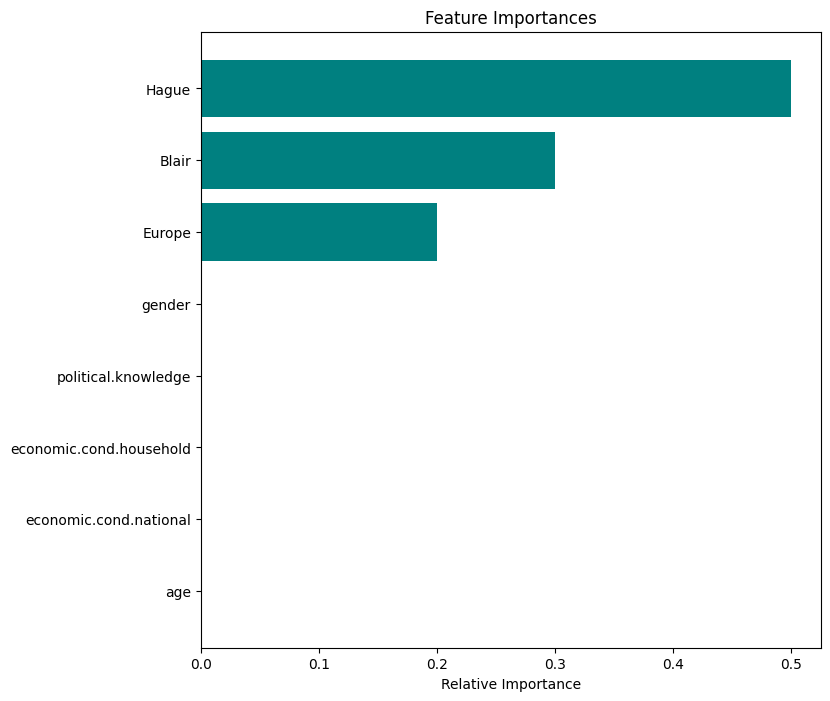

In [ ]:
#important feature as per Ada Booster

importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###Gradient Boosting Classifier

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.9)

In [ ]:
#get metrics of the after hyper tunning of Gradient Boosting
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.8884723523898782
Accuracy on test set :  0.8427947598253275
Recall on training set :  0.9395161290322581
Recall on test set :  0.896551724137931
Precision on training set :  0.9042690815006468
Precision on test set :  0.88
F1 Score on training set :  0.9215557020435069
F1 Score on test set :  0.8881987577639752


In [ ]:
# predict the Y value of Train Data of Gradient Boosting
y_pred_gbc_tuned_train = gbc_tuned.predict(X_train)

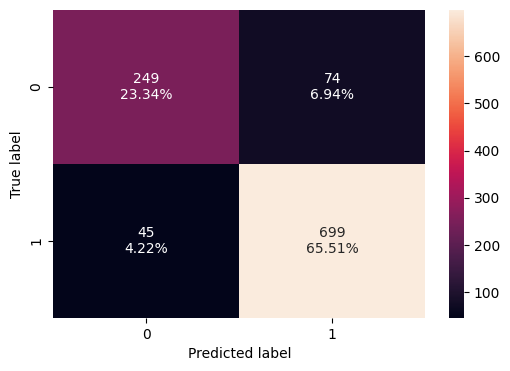

In [ ]:
#confusion matrix of the Train data of Gradient Boosting
confusion_matrix_sklearn(gbc_tuned,X_train, y_train)

In [ ]:
#classification report of the Train data of Gradient Boosting
print(classification_report(y_train, y_pred_gbc_tuned_train))

              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81       323
         1.0       0.90      0.94      0.92       744

    accuracy                           0.89      1067
   macro avg       0.88      0.86      0.86      1067
weighted avg       0.89      0.89      0.89      1067



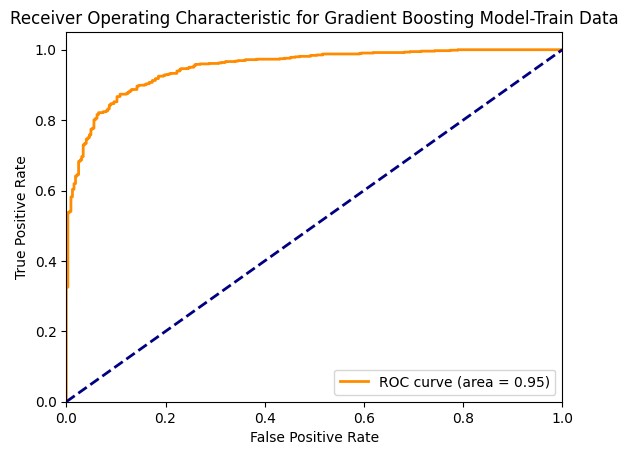

ROC-AUC Score: 0.9499421585272478


In [ ]:
#roc_auc score and curve for the Train data of Gradient Boosting

# Get predicted probabilities for the positive class
y_pred_proba = gbc_tuned.predict_proba(X_train)[:, 1]

# Call the function with the test labels and predicted probabilities
roc_auc = plot_auc_curve(y_train, y_pred_proba, 'Receiver Operating Characteristic for Gradient Boosting Model-Train Data')
print("ROC-AUC Score:", roc_auc)



In [ ]:
# predict the Y value of Test Data Data of Gradient Boosting
y_pred_gbc_tuned_test = gbc_tuned.predict(X_test)

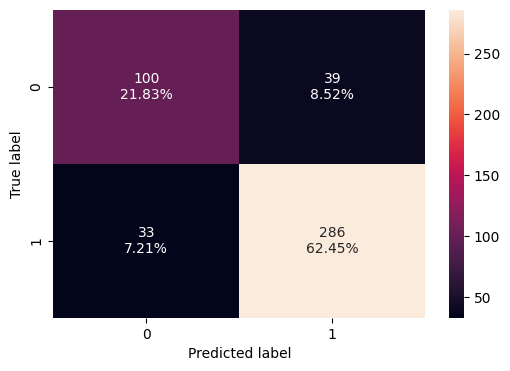

In [ ]:
#confusion matrix of the Test data of Gradient Boosting
confusion_matrix_sklearn(gbc_tuned,X_test, y_test)

In [ ]:
#classification report of the Test data of Gradient Boosting
print(classification_report(y_test, y_pred_gbc_tuned_test))


              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74       139
         1.0       0.88      0.90      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.81      0.81       458
weighted avg       0.84      0.84      0.84       458



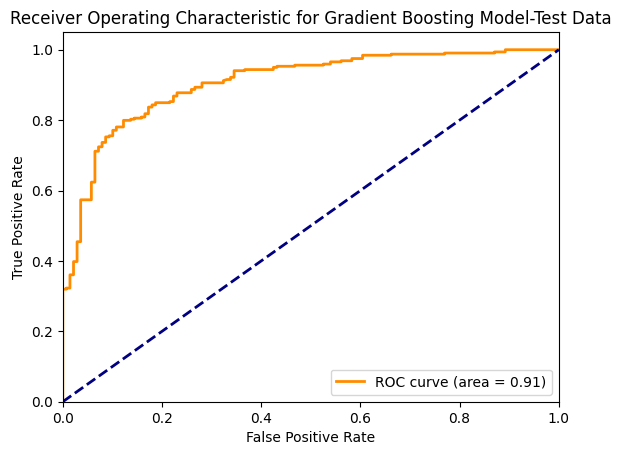

ROC-AUC Score: 0.9060350465708937


In [ ]:
#roc_auc score and curve for the test data of Gradient Boosting

# Get predicted probabilities for the positive class
y_pred_proba = gbc_tuned.predict_proba(X_test)[:, 1]

# Call the function with the test labels and predicted probabilities
roc_auc = plot_auc_curve(y_test, y_pred_proba, 'Receiver Operating Characteristic for Gradient Boosting Model-Test Data')
print("ROC-AUC Score:", roc_auc)


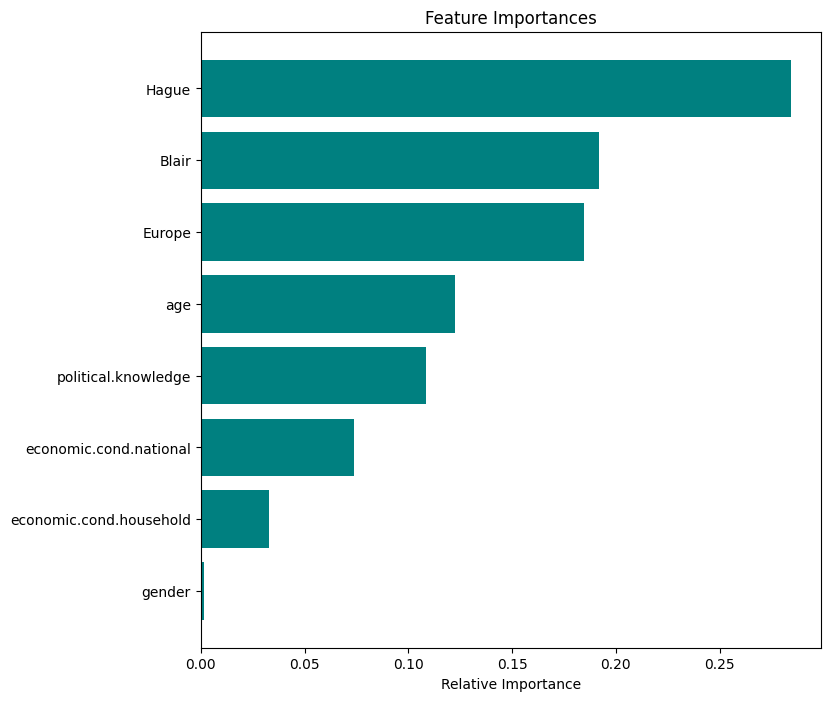

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for XGBoost: ", grid_search_xgb.best_params_)

# Evaluate on train and test data using the best estimator
xgb_best = grid_search_xgb.best_estimator_
train_accuracy_xgb = xgb_best.score(X_train, y_train)
test_accuracy_xgb = xgb_best.score(X_test, y_test)
print(f"Train Accuracy: {train_accuracy_xgb}, Test Accuracy: {test_accuracy_xgb}")


Best parameters for XGBoost:  {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}
Train Accuracy: 0.8772258669165885, Test Accuracy: 0.8427947598253275


In [ ]:
##get metrics of the after hyper tunning of XGBoostBoosting
xgb_best_score=get_metrics_score(xgb_best)

Accuracy on training set :  0.8772258669165885
Accuracy on test set :  0.8427947598253275
Recall on training set :  0.928763440860215
Recall on test set :  0.9028213166144201
Precision on training set :  0.8985695708712613
Precision on test set :  0.8753799392097265
F1 Score on training set :  0.913417052214144
F1 Score on test set :  0.888888888888889


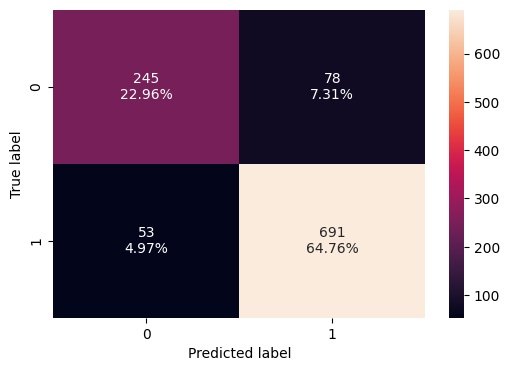

In [ ]:
#print the conufsion  matrix of the Train
confusion_matrix_sklearn(xgb_best,X_train, y_train)

In [ ]:
#print Clasification matric of the  Train Data
from sklearn.metrics import classification_report
print(classification_report(y_train, xgb_best.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79       323
         1.0       0.90      0.93      0.91       744

    accuracy                           0.88      1067
   macro avg       0.86      0.84      0.85      1067
weighted avg       0.88      0.88      0.88      1067



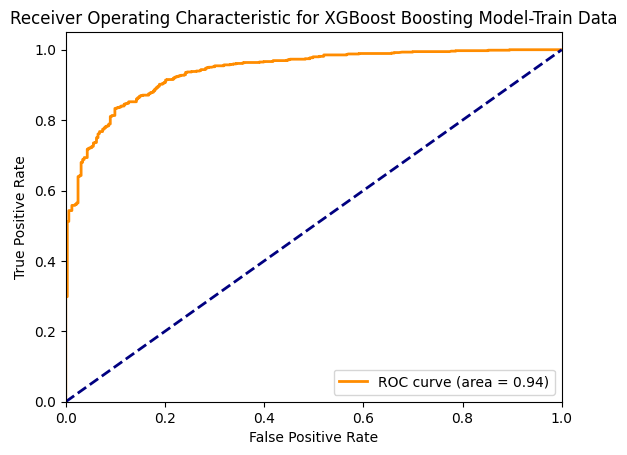

ROC-AUC Score: 0.9386235393987816


In [ ]:
#roc_auc score and curve for the Train data of XGBoost Boosting

# Get predicted probabilities for the positive class
y_pred_proba = xgb_best.predict_proba(X_train)[:, 1]

# Call the function with the test labels and predicted probabilities
roc_auc = plot_auc_curve(y_train, y_pred_proba, 'Receiver Operating Characteristic for XGBoost Boosting Model-Train Data')
print("ROC-AUC Score:", roc_auc)


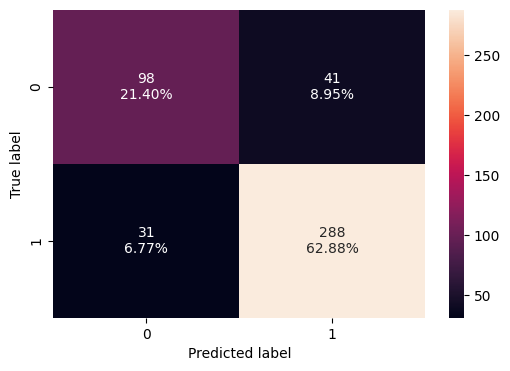

In [ ]:
#print the conufsion  matrix of the test
confusion_matrix_sklearn(xgb_best,X_test, y_test)

In [ ]:
#print Clasification matric of the  test Data
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_best.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       139
         1.0       0.88      0.90      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458



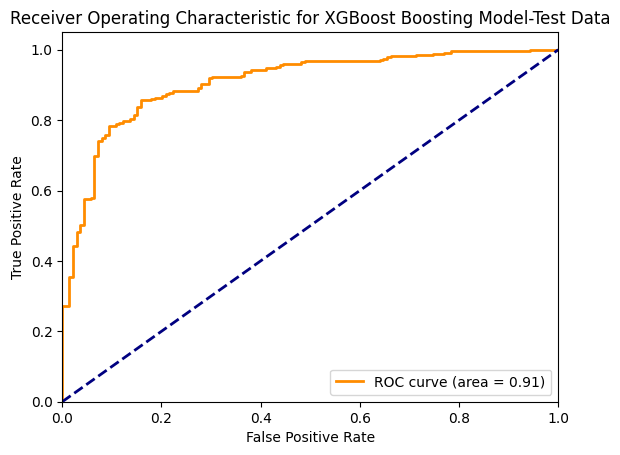

ROC-AUC Score: 0.9076475496718613


In [ ]:
#roc_auc score and curve for the test data of XGBoost Boosting

# Get predicted probabilities for the positive class
y_pred_proba = xgb_best.predict_proba(X_test)[:, 1]

# Call the function with the test labels and predicted probabilities
roc_auc = plot_auc_curve(y_test, y_pred_proba, 'Receiver Operating Characteristic for XGBoost Boosting Model-Test Data')
print("ROC-AUC Score:", roc_auc)

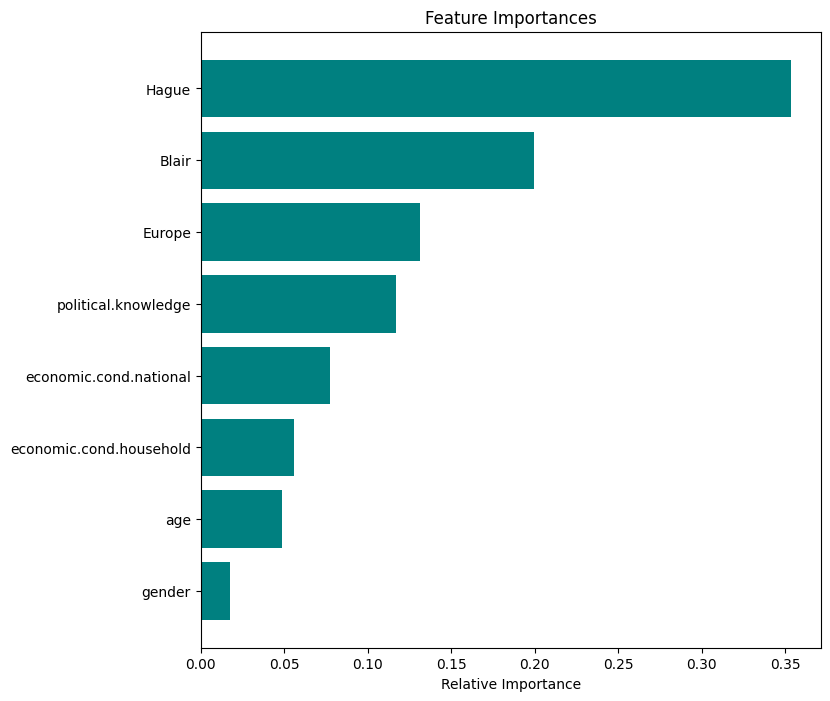

In [ ]:
importances = xgb_best.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#cross validation of all hyper tuned model with K=5


from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

# Define your models
models = {
    "Random Forest": rf_best,
    "Gradient Boosting":gbc_tuned,
    "XGBoost": xgb_best,
    "AdaBoost": abc_tuned
}

# Define the cross-validation strategy (Stratified k-Fold)
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

# Evaluate each model using cross-validation
for model_name, model in models.items():
    # Define the scoring metrics
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    # Perform cross-validation
    cv_results = cross_validate(model, X_train, y_train, cv=skf, scoring=scoring)

    # Collect the mean and standard deviation for each metric
    print(f"Results for {model_name}:")
    for metric in scoring:
        print(f"{metric}: {cv_results['test_' + metric].mean():.4f} (+/- {cv_results['test_' + metric].std():.4f})")

    print("\n")

Results for Random Forest:
accuracy: 0.8323 (+/- 0.0192)
precision: 0.8551 (+/- 0.0187)
recall: 0.9153 (+/- 0.0319)
f1: 0.8837 (+/- 0.0147)
roc_auc: 0.8843 (+/- 0.0271)


Results for Gradient Boosting:
accuracy: 0.8332 (+/- 0.0240)
precision: 0.8648 (+/- 0.0153)
recall: 0.9019 (+/- 0.0296)
f1: 0.8827 (+/- 0.0184)
roc_auc: 0.8888 (+/- 0.0168)


Results for XGBoost:
accuracy: 0.8304 (+/- 0.0209)
precision: 0.8641 (+/- 0.0086)
recall: 0.8978 (+/- 0.0296)
f1: 0.8805 (+/- 0.0166)
roc_auc: 0.8867 (+/- 0.0219)


Results for AdaBoost:
accuracy: 0.7882 (+/- 0.0285)
precision: 0.7853 (+/- 0.0177)
recall: 0.9584 (+/- 0.0191)
f1: 0.8633 (+/- 0.0181)
roc_auc: 0.8453 (+/- 0.0214)




#### Final Model Selection
- Compare all the model built so far - Select the final model with the proper justification - Check the most important features in the final model with  inferences.

In [ ]:
# Compare all the model built so far
metrics_list = [
    knn_score_before_hyperparameter,
    knn_score_after_hyperparameter,
    nb_score_before_hyperparameter,
    GNN_score_after_hyperparameter,
    rf_metrics_before_tuning,
    rf_metrics_after_tuning,
    abc_score,
    abc_tuned_score,
    gbc_score,
    gbc_tuned_score,
    xgb_score,
    xgb_best_score
]

# Ensure all elements are converted to Series
metrics_series_list = [pd.Series(metric) if not isinstance(metric, (pd.Series, pd.DataFrame)) else metric for metric in metrics_list]

# Concatenate the metrics Series
models_comp_df = pd.concat(metrics_series_list, axis=1)

# Define column names
models_comp_df.columns = [
    "KNN Model",
    "Tuned KNN Model",
    "Naive Bayes Model",
    "Tuned Naive Bayes Model",
    "Random Forest Model",
    "Tuned Random Forest Model",
    "AdaBoost Model",
    "Tuned AdaBoost Model",
    "Gradient Boosting Model",
    "Tuned Gradient Boosting Model",
    "XGBoost Model",
    "Tuned XGBoost Model"
]

# Define the index
index_labels = [
    "Accuracy on training set",
    "Accuracy on test set",
    "Recall on training set",
    "Recall on test set",
    "Precision on training set",
    "Precision on test set",
    "F1 Score on training set",
    "F1 Score on test set"
]

# Set the index
models_comp_df.index = index_labels

# Print the resulting DataFrame
print("Model performance comparison:")
models_comp_df


Model performance comparison:


KNN Model  Tuned KNN Model  Naive Bayes Model  \
Accuracy on training set    0.876289         0.850047           0.828491   
Accuracy on test set        0.816594         0.831878           0.844978   
Recall on training set      0.927419         0.918011           0.883065   
Recall on test set          0.884013         0.905956           0.902821   
Precision on training set   0.898438         0.873402           0.872510   
Precision on test set       0.857143         0.860119           0.878049   
F1 Score on training set    0.912698         0.895151           0.877756   
F1 Score on test set        0.870370         0.882443           0.890263   

                           Tuned Naive Bayes Model  Random Forest Model  \
Accuracy on training set                  0.828491             1.000000   
Accuracy on test set                      0.844978             0.844978   
Recall on training set                    0.883065             1.000000   
Recall on test set                        0.902821             0.909091   
Precision on training set                 0.872510             1.000000   
Precision on test set                     0.878049             0.873494   
F1 Score on training set                  0.877756             1.000000   
F1 Score on test set                      0.890263             0.890937   

                           Tuned Random Forest Model  AdaBoost Model  \
Accuracy on training set                    0.910965        0.836926   
Accuracy on test set                        0.831878        0.834061   
Recall on training set                      0.956989        0.900538   
Recall on test set                          0.918495        0.902821   
Precision on training set                   0.918710        0.870130   
Precision on test set                       0.851744        0.864865   
F1 Score on training set                    0.937459        0.885073   
F1 Score on test set                        0.883861        0.883436   

                           Tuned AdaBoost Model  Gradient Boosting Model  \
Accuracy on training set               0.788191                 0.892221   
Accuracy on test set                   0.794760                 0.840611   
Recall on training set                 0.958333                 0.936828   
Recall on test set                     0.962382                 0.905956   
Precision on training set              0.785242                 0.911111   
Precision on test set                  0.789203                 0.870482   
F1 Score on training set               0.863196                 0.923791   
F1 Score on test set                   0.867232                 0.887865   

                           Tuned Gradient Boosting Model  XGBoost Model  \
Accuracy on training set                        0.888472       0.994377   
Accuracy on test set                            0.842795       0.825328   
Recall on training set                          0.939516       0.993280   
Recall on test set                              0.896552       0.880878   
Precision on training set                       0.904269       0.998649   
Precision on test set                           0.880000       0.869969   
F1 Score on training set                        0.921556       0.995957   
F1 Score on test set                            0.888199       0.875389   

                           Tuned XGBoost Model  
Accuracy on training set              0.877226  
Accuracy on test set                  0.842795  
Recall on training set                0.928763  
Recall on test set                    0.902821  
Precision on training set             0.898570  
Precision on test set                 0.875380  
F1 Score on training set              0.913417  
F1 Score on test set                  0.888889

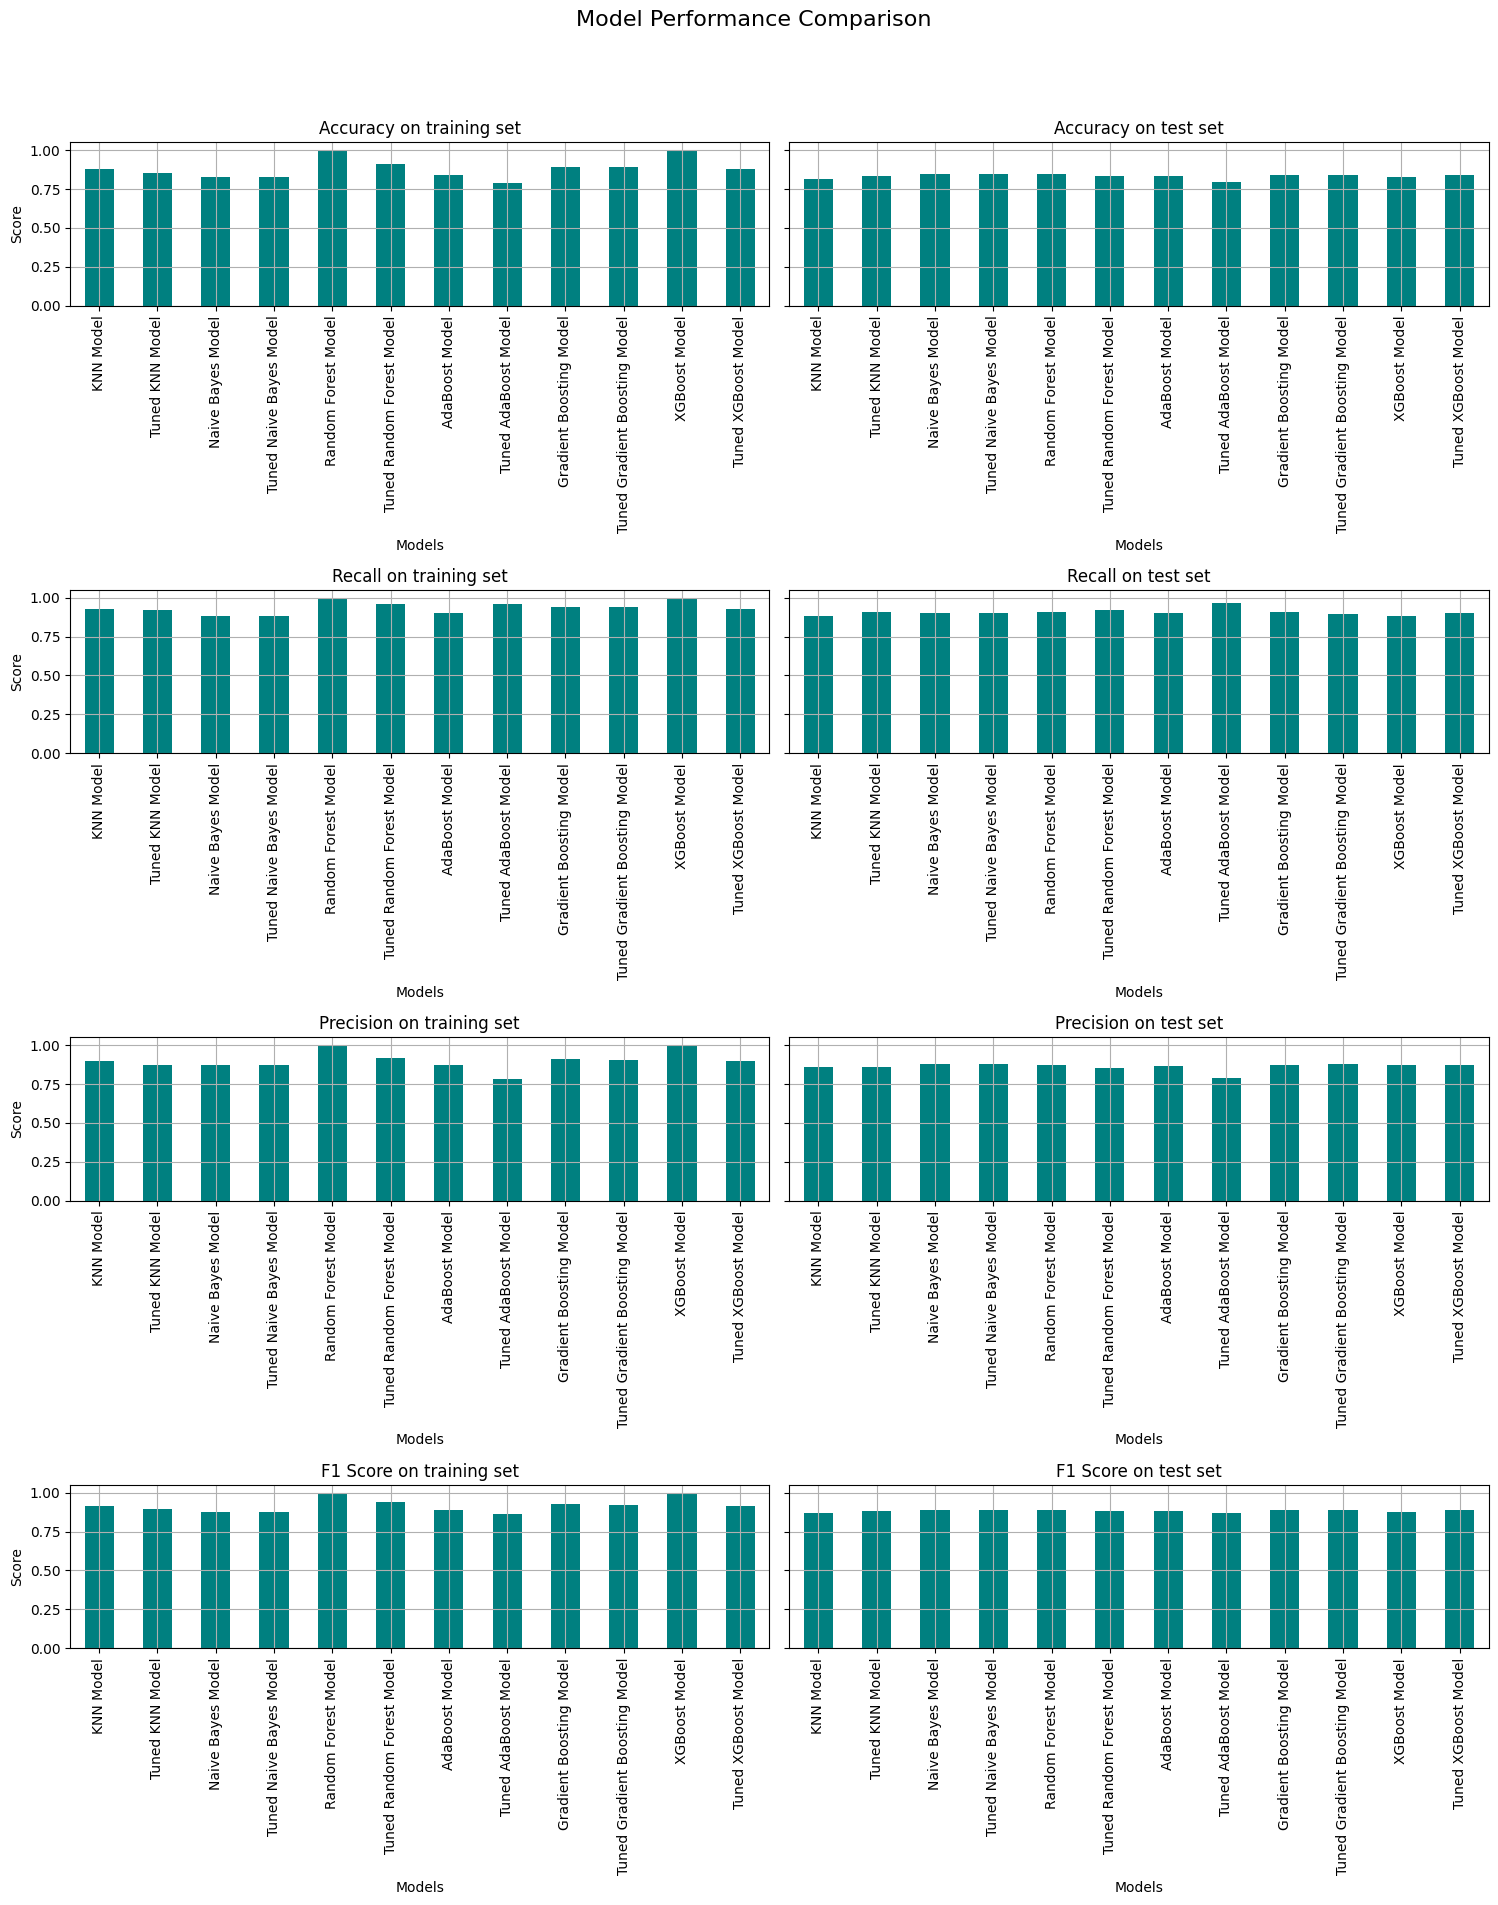

In [ ]:
# Plotting the metrics
fig, axes = plt.subplots(4, 2, figsize=(15, 20), sharey=True)
fig.suptitle('Model Performance Comparison', fontsize=16)

metrics = [
    "Accuracy on training set",
    "Accuracy on test set",
    "Recall on training set",
    "Recall on test set",
    "Precision on training set",
    "Precision on test set",
    "F1 Score on training set",
    "F1 Score on test set"
]

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    a1=models_comp_df.loc[metric].plot(kind='bar', color="teal", ax=ax)
    ax.set_title(metric)
    ax.set_ylabel('Score')
    ax.set_xlabel('Models')
    #a1.bar_label(a1.containers[0], color='teal')
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# Compute average performance on test set for each model
average_test_metrics = models_comp_df.loc[
    [
        "Accuracy on test set",
        "Recall on test set",
        "Precision on test set",
        "F1 Score on test set"
    ]
].mean()

# Identify the model with the highest average test performance
best_model = average_test_metrics.idxmax()
best_model_avg_score = average_test_metrics.max()

print("Best Model:", best_model)
print("Average Test Set Score:", best_model_avg_score)

"""Extract the relevant metrics for the test set.
Compute the mean of these metrics for each model.
Identify the model with the highest average score on the test set."""


Best Model: Random Forest Model
Average Test Set Score: 0.8796250177256666


'Extract the relevant metrics for the test set.\nCompute the mean of these metrics for each model.\nIdentify the model with the highest average score on the test set.'

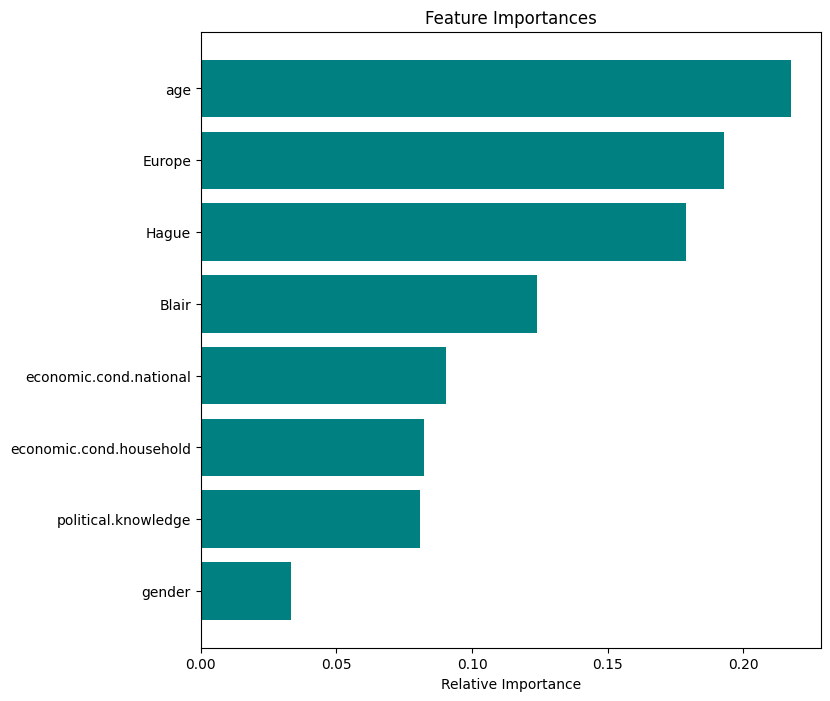

In [ ]:
#important feature as per Random Forest

importances = rf_f.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##word Analytic

Define the problem and Perform Exploratory Data Analysis
-Problem Definition - Find the number of Character, words & sentences in all three speeches

Importing necessary libraries

In [ ]:
import re, string, unicodedata                                          #Used for Text PreProcessing
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt                                         # Used for plotting
import seaborn as sns                                                   # Used for plotting
from collections import Counter                                           # count the key-value pairs in an object

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           # Used for plotting the wordcloud of a corpus
import nltk                                                               # Used for different task of NLP
from nltk.corpus import stopwords                                         # Used for removal of stop words
import warnings
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer                                #Used for Stemming of words in the corpus

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

The objective is to analyze the speeches of Presidents Franklin D. Roosevelt (1941), John F. Kennedy (1961), and Richard Nixon (1973). By defining the problem clearly, we aim to find meaningful insights from their speeches. Specifically, we're interested in determining the number of characters, words, and sentences in each speech to understand their structure and verbosity

In [ ]:
#Code Snippet to extract the three speeches:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

 EDA involves understanding the basic structure and content of the text data

In [ ]:
#read the 1941-roosevelt.txt
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [ ]:
#read the 11961-Kennedy.txt
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [ ]:
#Character of speeches
print("Character of speech - 1941-Roosevelt.txt:",len(inaugural.raw('1941-Roosevelt.txt')))
print("Character of speech - 1961-Kennedy.txt:",len(inaugural.raw('1961-Kennedy.txt')))
print("Character of speech - 1973-Nixon.txt:",len(inaugural.raw('1973-Nixon.txt')))

Character of speech - 1941-Roosevelt.txt: 7571
Character of speech - 1961-Kennedy.txt: 7618
Character of speech - 1973-Nixon.txt: 9991


word count in each speech

In [ ]:
#word count in 1941 Roosevelt Speech
word_count_1941_Roosevelt = len(inaugural.raw('1941-Roosevelt.txt').split())
word_count_1941_Roosevelt

1360

In [ ]:
#word count in 1941 Kennedy Speech
word_count_1961_Kennedy = len(inaugural.raw('1961-Kennedy.txt').split())
word_count_1961_Kennedy

1390

In [ ]:
#word count in 1941 Nixon Speech
word_count_1973_Nixon = len(inaugural.raw('1973-Nixon.txt').split())
word_count_1973_Nixon

1819

Sentence Count in each speech

In [ ]:
# assign Speech  variable value
Roosevelt_text = inaugural.raw('1941-Roosevelt.txt')
Kennedy_text = inaugural.raw('1961-Kennedy.txt')
Nixon_text = inaugural.raw('1973-Nixon.txt')

In [ ]:
#sentence count in 1941 Roosevelt Speech
import nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(Roosevelt_text)
sentence_count_1941_Roosevelt = len(sentences)
print("Sentence in 1941 Roosevelt speech: ", sentence_count_1941_Roosevelt)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Sentence in 1941 Roosevelt speech:  68


In [ ]:
#sentence count in 1961 Kennedy_text
sentences=nltk.sent_tokenize(Kennedy_text)
sentence_count_1961_Kennedy = len(sentences)
print("Sentence in 1961 Kennedy speech: ", sentence_count_1961_Kennedy)

Sentence in 1961 Kennedy speech:  52


In [ ]:
#sentence count in 1973 Nixon_text
sentences=nltk.sent_tokenize(Nixon_text)
sentence_count_Nixon_text = len(sentences)
print("Sentence in 1961 Kennedy speech: ", sentence_count_Nixon_text)

Sentence in 1961 Kennedy speech:  68


In [ ]:
#lets put the speeches into the DataFrame

speeches = {
    "President": ["Franklin D. Roosevelt", "John F. Kennedy", "Richard Nixon"],
    "Year": [1941, 1961, 1973],
    "Speech": [Roosevelt_text, Kennedy_text, Nixon_text]
}


In [ ]:
#Convert to DataFrame
df_speeches = pd.DataFrame(speeches)

In [ ]:
import nltk
nltk.download('punkt')

df_speeches['Char_Count'] = df_speeches['Speech'].apply(len)
df_speeches['Word_Count'] = df_speeches['Speech'].apply(lambda x: len(x.split()))
df_speeches['Sentence_Count'] = df_speeches['Speech'].apply(lambda x: len(nltk.sent_tokenize(x)))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(df_speeches)



               President  Year  \
0  Franklin D. Roosevelt  1941   
1        John F. Kennedy  1961   
2          Richard Nixon  1973   

                                              Speech  Char_Count  Word_Count  \
0  On each national day of inauguration since 178...        7571        1360   
1  Vice President Johnson, Mr. Speaker, Mr. Chief...        7618        1390   
2  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        9991        1819   

   Sentence_Count  
0              68  
1              52  
2              68  


Overview of the Dataset
* View the first and last 5 rows of the dataset

In [ ]:
#first five rows of the data
df_speeches.head()

President  Year  \
0  Franklin D. Roosevelt  1941   
1        John F. Kennedy  1961   
2          Richard Nixon  1973   

                                              Speech  Char_Count  Word_Count  \
0  On each national day of inauguration since 178...        7571        1360   
1  Vice President Johnson, Mr. Speaker, Mr. Chief...        7618        1390   
2  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        9991        1819   

   Sentence_Count  
0              68  
1              52  
2              68

In [ ]:
# read the file and return list of lines.
Kennedy_all_lines = inaugural.open('1941-Roosevelt.txt').readlines()

# ignore the blank/empty lines.
sentence = [line for line in Kennedy_all_lines if line!='\n']

print('Number of sentences in Roosevelt file:',len(sentence))

Number of sentences in Roosevelt file: 38


In [ ]:
# read the file and return list of lines.
Kennedy_all_lines = inaugural.open('1961-Kennedy.txt').readlines()

# ignore the blank/empty lines.
sentence = [line for line in Kennedy_all_lines if line!='\n']
print('Number of sentences in Kennedy file:',len(sentence))

Number of sentences in Kennedy file: 27


In [ ]:
# read the file and return list of lines.
Kennedy_all_lines = inaugural.open('1973-Nixon.txt').readlines()

# ignore the blank/empty lines.
sentence = [line for line in Kennedy_all_lines if line!='\n']
print('Number of sentences in Nixon file:',len(sentence))

Number of sentences in Nixon file: 51


Problem 2 - Text cleaning
- Stopword removal - Stemming - find the 3 most common words used in all three speeches

Importing necessary libraries

In [ ]:
import re, string, unicodedata                                          #Used for Text PreProcessing
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt                                         # Used for plotting
import seaborn as sns                                                   # Used for plotting
from collections import Counter                                           # count the key-value pairs in an object

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           # Used for plotting the wordcloud of a corpus
import nltk                                                               # Used for different task of NLP
from nltk.corpus import stopwords                                         # Used for removal of stop words
import warnings
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer                                #Used for Stemming of words in the corpus

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
#Import Necessary Libraries:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df_speeches.columns

Index(['President', 'Year', 'Speech', 'Char_Count', 'Word_Count',
       'Sentence_Count'],
      dtype='object')

In [ ]:
#pre-processing
#Lowercase

df_speeches["Speech"]=df_speeches["Speech"].str.lower()

In [ ]:
df_speeches.head()

President  Year  \
0  Franklin D. Roosevelt  1941   
1        John F. Kennedy  1961   
2          Richard Nixon  1973   

                                              Speech  Char_Count  Word_Count  \
0  on each national day of inauguration since 178...        7571        1360   
1  vice president johnson, mr. speaker, mr. chief...        7618        1390   
2  mr. vice president, mr. speaker, mr. chief jus...        9991        1819   

   Sentence_Count  
0              68  
1              52  
2              68

In [ ]:
import string
def remove_punctuation(text):
    """
    Function to remove punctuation from a string using regular expression.

    Parameters:
    text (str): The input string from which punctuation will be removed.

    Returns:
    str: String without punctuation.
    """
    # Define regex pattern to match punctuation
    pattern = r'[^\w\s]'

    # Use re.sub to remove punctuation
    no_punct = re.sub(pattern, '', text)

    return no_punct

In [ ]:
df_speeches['Speech_proc'] = df_speeches['Speech'].apply(remove_punctuation)

In [ ]:
df_speeches.head()

President  Year  \
0  Franklin D. Roosevelt  1941   
1        John F. Kennedy  1961   
2          Richard Nixon  1973   

                                              Speech  Char_Count  Word_Count  \
0  on each national day of inauguration since 178...        7571        1360   
1  vice president johnson, mr. speaker, mr. chief...        7618        1390   
2  mr. vice president, mr. speaker, mr. chief jus...        9991        1819   

   Sentence_Count                                        Speech_proc  
0              68  on each national day of inauguration since 178...  
1              52  vice president johnson mr speaker mr chief jus...  
2              68  mr vice president mr speaker mr chief justice ...

2. Stopword Removal:

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [ ]:
df_speeches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   President       3 non-null      object
 1   Year            3 non-null      int64 
 2   Speech          3 non-null      object
 3   Char_Count      3 non-null      int64 
 4   Word_Count      3 non-null      int64 
 5   Sentence_Count  3 non-null      int64 
 6   Speech_proc     3 non-null      object
dtypes: int64(4), object(3)
memory usage: 296.0+ bytes


In [ ]:
#change all object data to  category
df_speeches["Speech_proc"]=df_speeches["Speech_proc"].astype('category')

In [ ]:
#remove Stop words
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)


In [ ]:
#stemming
ps = PorterStemmer()

def stem_words(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [ps.stem(word) for word in words]
    return " ".join(stemmed_words)


In [ ]:
df_speeches['Cleaned_Speech'] = df_speeches['Speech_proc'].apply(remove_stopwords).apply(stem_words)

In [ ]:
df_speeches["Cleaned_Speech"].str.len()

0    4030
1    4248
2    5157
Name: Cleaned_Speech, dtype: int64

In [ ]:
def get_most_common_words(text, n=10):
    words = nltk.word_tokenize(text)
    word_freq = Counter(words)
    common_words = word_freq.most_common(n)
    return ', '.join([word for word, count in common_words])

In [ ]:
df_speeches['Most_Common_Words'] = df_speeches['Cleaned_Speech'].apply(get_most_common_words)

In [ ]:
df_speeches.head()

President  Year  \
0  Franklin D. Roosevelt  1941   
1        John F. Kennedy  1961   
2          Richard Nixon  1973   

                                              Speech  Char_Count  Word_Count  \
0  on each national day of inauguration since 178...        7571        1360   
1  vice president johnson, mr. speaker, mr. chief...        7618        1390   
2  mr. vice president, mr. speaker, mr. chief jus...        9991        1819   

   Sentence_Count                                        Speech_proc  \
0              68  on each national day of inauguration since 178...   
1              52  vice president johnson mr speaker mr chief jus...   
2              68  mr vice president mr speaker mr chief justice ...   

                                      Cleaned_Speech  \
0  nation day inaugur sinc 1789 peopl renew sens ...   
1  vice presid johnson mr speaker mr chief justic...   
2  mr vice presid mr speaker mr chief justic sena...   

                                   Most_Common_Words  
0  nation, know, peopl, spirit, life, democraci, ...  
1  let, us, power, world, nation, side, new, pled...  
2  us, let, america, peac, world, respons, new, n...

In [ ]:
#remove the words let and us from all the speeches without function
def remove_specific_words(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in ['let', 'us']]
    return " ".join(filtered_words)



In [ ]:
# Apply the function to the 'Speech_proc' column
df_speeches['Cleaned_Speech'] = df_speeches['Cleaned_Speech'].apply(remove_specific_words)

# Display the updated DataFrame
print(df_speeches)

               President  Year  \
0  Franklin D. Roosevelt  1941   
1        John F. Kennedy  1961   
2          Richard Nixon  1973   

                                              Speech  Char_Count  Word_Count  \
0  on each national day of inauguration since 178...        7571        1360   
1  vice president johnson, mr. speaker, mr. chief...        7618        1390   
2  mr. vice president, mr. speaker, mr. chief jus...        9991        1819   

   Sentence_Count                                        Speech_proc  \
0              68  on each national day of inauguration since 178...   
1              52  vice president johnson mr speaker mr chief jus...   
2              68  mr vice president mr speaker mr chief justice ...   

                                      Cleaned_Speech  \
0  nation day inaugur sinc 1789 peopl renew sens ...   
1  vice presid johnson mr speaker mr chief justic...   
2  mr vice presid mr speaker mr chief justic sena...   

                            

In [ ]:
df_speeches['Most_Common_Words'] = df_speeches['Cleaned_Speech'].apply(get_most_common_words)

In [ ]:
df_speeches.head()

President  Year  \
0  Franklin D. Roosevelt  1941   
1        John F. Kennedy  1961   
2          Richard Nixon  1973   

                                              Speech  Char_Count  Word_Count  \
0  on each national day of inauguration since 178...        7571        1360   
1  vice president johnson, mr. speaker, mr. chief...        7618        1390   
2  mr. vice president, mr. speaker, mr. chief jus...        9991        1819   

   Sentence_Count                                        Speech_proc  \
0              68  on each national day of inauguration since 178...   
1              52  vice president johnson mr speaker mr chief jus...   
2              68  mr vice president mr speaker mr chief justice ...   

                                      Cleaned_Speech  \
0  nation day inaugur sinc 1789 peopl renew sens ...   
1  vice presid johnson mr speaker mr chief justic...   
2  mr vice presid mr speaker mr chief justic sena...   

                                   Most_Common_Words  
0  nation, know, peopl, spirit, life, democraci, ...  
1  power, world, nation, side, new, pledg, ask, c...  
2  america, peac, world, respons, new, nation, go...

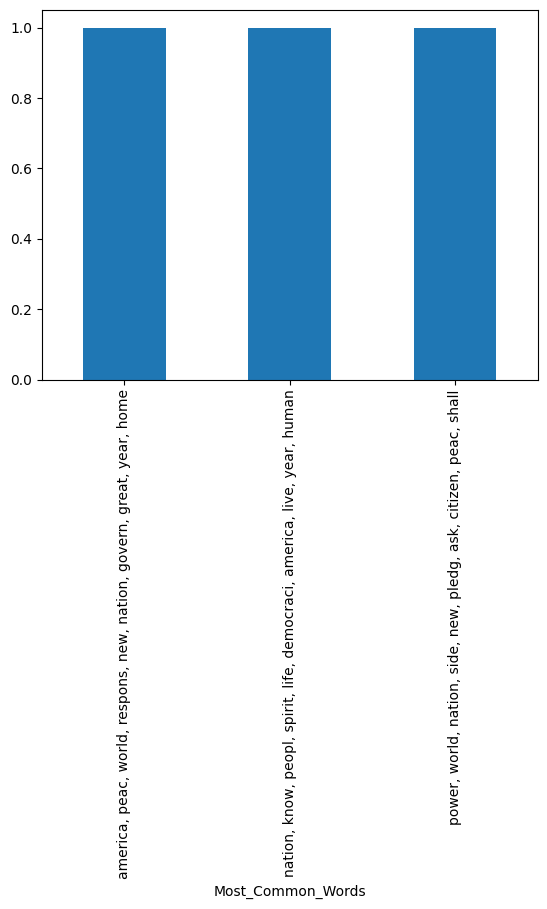

In [ ]:
df_speeches['Most_Common_Words'].value_counts().head(10).plot.bar()
plt.show()

Plot Word cloud of all three speeches
- the most common words used in all three speeches in the form of word clouds

In [ ]:
pip install wordcloud matplotlib


In [ ]:
#import the libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
#cleaned speech row 1, 2 and 3
cleaned_text_speech1=df_speeches["Cleaned_Speech"][0]
cleaned_text_speech2=df_speeches["Cleaned_Speech"][1]
cleaned_text_speech3=df_speeches["Cleaned_Speech"][2]

'nation day inaugur sinc 1789 peopl renew sens dedic unit state washington day task peopl creat weld togeth nation lincoln day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without us come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inact live nation determin count year lifetim human spirit life man threescor year ten littl littl less life nation full measur live men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tide american know true eight year ago life republ seem frozen fatalist terror prove true midst shock act act quickli boldli decis later year live year fruit year peopl democraci brought us greater secur hope better understand life ideal measur materi thing vital present futur experi democraci success surviv crisi home put away mani evil thing built new structur endur line maintain

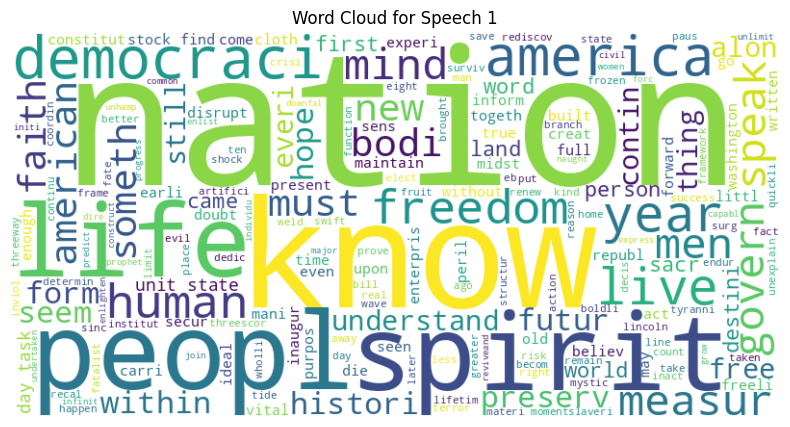

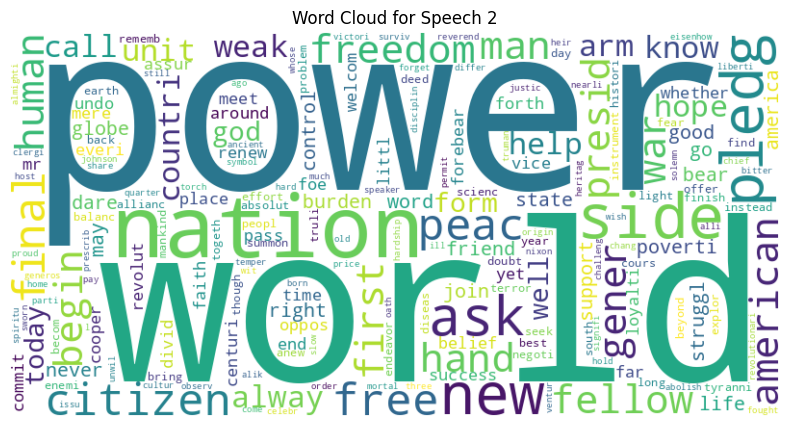

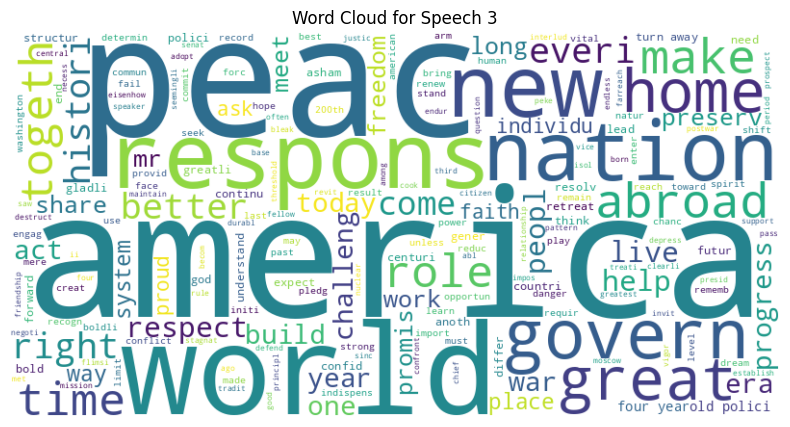

In [ ]:
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_word_cloud(cleaned_text_speech1, 'Word Cloud for Speech 1')
generate_word_cloud(cleaned_text_speech2, 'Word Cloud for Speech 2')
generate_word_cloud(cleaned_text_speech3, 'Word Cloud for Speech 3')
